# 1. EDA(Exporarly Data Analysis) 진행

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [102]:
rec_df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_data/train_40k.csv')
rec_df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_data/val_10k.csv')

In [3]:
rec_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    40000 non-null  object 
 1   Title        39984 non-null  object 
 2   userId       40000 non-null  object 
 3   Helpfulness  40000 non-null  object 
 4   Score        40000 non-null  float64
 5   Time         40000 non-null  int64  
 6   Text         40000 non-null  object 
 7   Cat1         40000 non-null  object 
 8   Cat2         40000 non-null  object 
 9   Cat3         40000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ MB


In [4]:
rec_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    10000 non-null  object 
 1   Title        9995 non-null   object 
 2   userId       10000 non-null  object 
 3   Helpfulness  10000 non-null  object 
 4   Score        10000 non-null  float64
 5   Time         10000 non-null  int64  
 6   Text         10000 non-null  object 
 7   Cat1         10000 non-null  object 
 8   Cat2         10000 non-null  object 
 9   Cat3         10000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 781.4+ KB


In [5]:
rec_df1 = rec_df1[rec_df1['userId'] != 'unknown'] #알 수 없는 정보 제거
rec_df2 = rec_df2[rec_df2['userId'] != 'unknown'] #알 수 없는 정보 제거

rec_df1 = rec_df1.drop(['Title', 'Helpfulness', 'Time', 'Cat3'], axis = 1) #불필요한 Feature 제거
rec_df2 = rec_df2.drop(['Title', 'Helpfulness', 'Time', 'Cat3'], axis = 1) #불필요한 Feature 제거

In [6]:
rec_df = pd.concat([rec_df1, rec_df2])

In [7]:
rec_df = rec_df.reset_index(drop = True)
rec_df

,productId,userId,Score,Text,Cat1,Cat2
0,B000E46LYG,A3MQDNGHDJU4MK,3.0,The description and photo on this product need...,grocery gourmet food,meat poultry
1,B00000JHQ0,AL91D1BD8J3WG,5.0,I've used these batteries my entire life in ev...,health personal care,household supplies
2,B00000IWGB,A2AXQTB83VMK4L,4.0,It's easy enough to learn and get into to. If ...,toys games,games
3,B00004CI84,A1048CYU0OV4O8,5.0,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,grocery gourmet food,beverages
4,B0000017QZ,A2VEX3YDK12LWE,5.0,this is one ofthe best i have ever heard for n...,health personal care,health care
...,...,...,...,...,...,...
48041,B000FGDDI0,A3RUBUKF0YX4C7,4.0,Stays on continuously without shutting off! It...,health personal care,health care
48042,B000FVC78C,A1O9H18FJG81FS,4.0,these look great in our 10 gallon tank- colors...,pet supplies,fish aquatic pets
48043,B000ICJ8DA,A3D96MTZP9C1Y,4.0,"This works great, but needs a better way to at...",pet supplies,dogs
48044,B000Q7AH3W,A37L6DBOH234BC,5.0,she absolutely LOVES this thing. I dice up gre...,pet supplies,dogs


No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


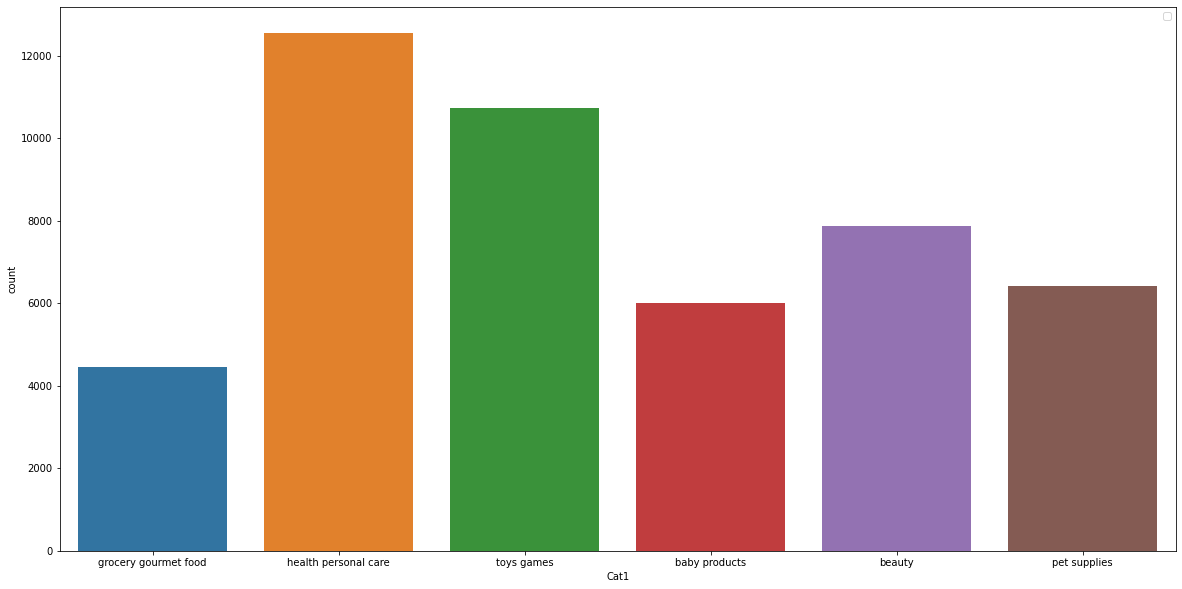

In [72]:
plt.figure(figsize = (20, 10))
plt.legend()
sns.countplot(rec_df['Cat1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


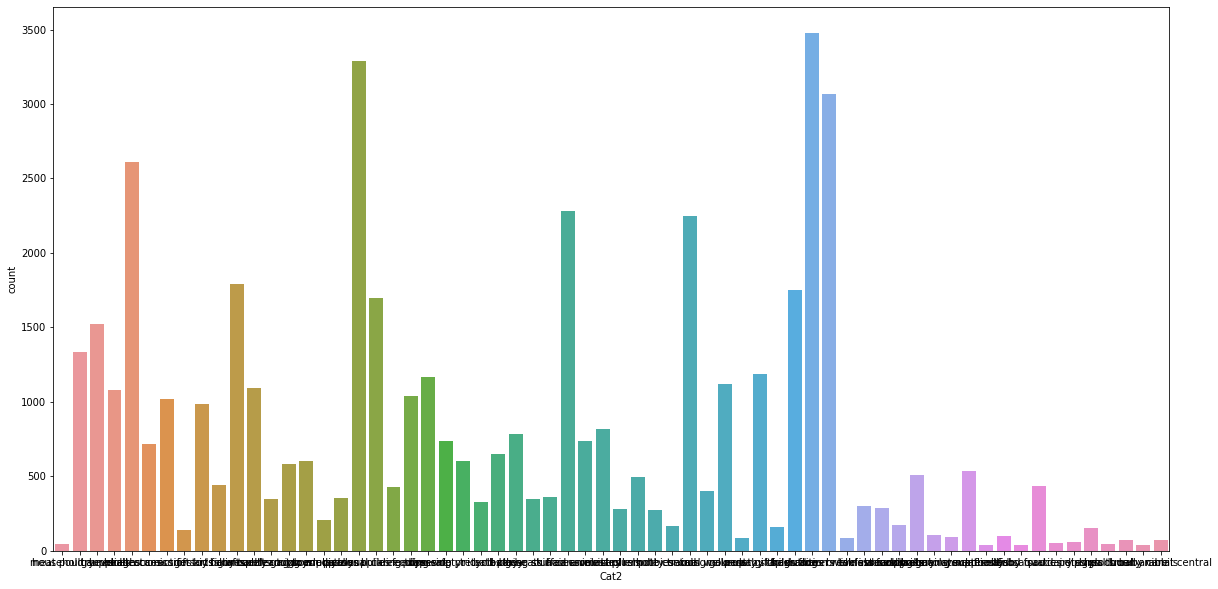

In [9]:
plt.figure(figsize = (20, 10))
sns.countplot(rec_df['Cat2'])

# 2. 협업필터링(아이템 기반) 구축

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import random

In [11]:
rec = rec_df[['productId', 'userId', 'Score']]
rec

,productId,userId,Score
0,B000E46LYG,A3MQDNGHDJU4MK,3.0
1,B00000JHQ0,AL91D1BD8J3WG,5.0
2,B00000IWGB,A2AXQTB83VMK4L,4.0
3,B00004CI84,A1048CYU0OV4O8,5.0
4,B0000017QZ,A2VEX3YDK12LWE,5.0
...,...,...,...
48041,B000FGDDI0,A3RUBUKF0YX4C7,4.0
48042,B000FVC78C,A1O9H18FJG81FS,4.0
48043,B000ICJ8DA,A3D96MTZP9C1Y,4.0
48044,B000Q7AH3W,A37L6DBOH234BC,5.0


In [12]:
rec1 = pd.DataFrame(rec['userId'].value_counts())
rec1 = rec1[rec1['userId'] > 2]
rec1

,userId
A3M174IC0VXOS2,25
A281NPSIMI1C2R,22
A1Z54EM24Y40LL,19
A1W9JOFE6F89FB,17
A3GM6SZMCUNYPS,16
...,...
AEWYUPCNDV7HY,3
AY388IC4HD3VL,3
A1CQON0P01BITL,3
A3IUDWDKA2G1KO,3


In [13]:
rec1 = rec1.reset_index()
rec1 = rec1.rename(columns = {'index' : 'userId', 'userId' : 'number'})
rec1

,userId,number
0,A3M174IC0VXOS2,25
1,A281NPSIMI1C2R,22
2,A1Z54EM24Y40LL,19
3,A1W9JOFE6F89FB,17
4,A3GM6SZMCUNYPS,16
...,...,...
252,AEWYUPCNDV7HY,3
253,AY388IC4HD3VL,3
254,A1CQON0P01BITL,3
255,A3IUDWDKA2G1KO,3


In [14]:
rec_data = pd.merge(rec, rec1, how = 'inner', on = 'userId')
rec_data

,productId,userId,Score,number
0,B000056JAZ,A2DBXBK9YAWWQ6,5.0,3
1,B0002XO5NS,A2DBXBK9YAWWQ6,5.0,3
2,B000FOJEXK,A2DBXBK9YAWWQ6,5.0,3
3,B00000IZPU,A1DTOHMM2Y5KY0,5.0,3
4,B00004UFOQ,A1DTOHMM2Y5KY0,5.0,3
...,...,...,...,...
1099,B00004UE4F,A2QV3TTP48RJRP,5.0,3
1100,B000NV7L0I,A2QV3TTP48RJRP,5.0,3
1101,B000Q6ECIO,A1TX27AW9DMFHH,5.0,3
1102,B000Q6I5TQ,A1TX27AW9DMFHH,5.0,3


In [15]:
rec_data = pd.pivot_table(rec_data, index = 'productId',
                     columns = 'userId',
                     values = 'Score')

rec_data

userId,A100CCQTI86IPF,A10Y1P3KSGN1UZ,A1115ST6F5CWYP,A11FX8HL2ANK6T,A11U94TLJYIYG0,A124H16ETAAGX6,A12AMBZJTC6MEB,A12C0UER29529W,A12ENBT314RFXR,A12M48NCU6GURO,A12PH6L5QSVTYN,A132ETQPMHQ585,A1335269OYXNPS,A13STKDYQO5DQ8,A13TO1ZFAH9SVN,A13TUGAAI1Y63A,A1409DK7GDFUXJ,A152I1BISLYNP9,A168O2YKPE9BE8,A17BUXSHOUOP4M,A17VIBT0O9LTPO,A17ZMCYTC61SVI,A19123D9G66E0O,A1A2QBFLIR5HCW,A1AP2LU7JGX6DE,A1BOJ3936IE1E0,A1C4J5MRES1KRK,A1CNVVEEJ8Q1ZR,A1CQON0P01BITL,A1CTEYY9TBS6W9,A1DTOHMM2Y5KY0,A1EUI1WWQJMXWT,A1EVV74UQYVKRY,A1FKQJ72DAP644,A1FXY0GUFHEI59,A1G6TJTVNUPYLU,A1HRYC60VTMYC0,A1IL6W1NK05UW9,A1JA99OS0ISEBB,A1JDILIHGMEPRI,...,AILM3RA8U0TND,AJB6NXJLATQLT,AJGU56YG8G1DQ,AJQDIT55SZ3ZX,AJZ9FMZC30EM5,AK0CENM3LUM28,AK7CAW3N1XZV6,AKCZIJ6ZHE41D,AKMEY1BSHSDG7,AKPJQZABVLRFR,AL0I8X5J1KBDB,AL6633WIKI7WE,ALDAF4VVLFRHP,ALLHJD3KZF9KC,AMPGRXQMO89X9,ANCLGWLDG6JUJ,APJINYKYAEJJ0,APLVNKSVKSYI1,APRB0DGZNQKK0,AQ8DU6XVA3USJ,AQZH7YTWQPOBE,ARSNOEEHHBKTK,AS3UM0LHN7L1Y,AS6SH2JM2YY3H,ATK1RL71E7AHC,ATUXNR3WHD18N,AW7FYP6TBY4AY,AW8EWPR4BBJQW,AWLK6NSSV0YNA,AXO4PQU0XG3TG,AXVKMYWNIHK7W,AY388IC4HD3VL,AYB4ELCS5AM8P,AYKG9PJK91VG1,AYWLGJPC5O7AQ,AZ31S5ACWRY15,AZ4IFJ01WKBTB,AZF13R8HNB59E,AZK9CCTYQNRNL,AZTY4WBRB5MAL
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B00000DMBB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00000DMBK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00000IT0W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00000IUXC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00000IW2S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000QX50JC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000R1XJ46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000RZNJII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [16]:
rec_data = rec_data.fillna(0)
rec_data.isnull().sum()

userId
A100CCQTI86IPF    0
A10Y1P3KSGN1UZ    0
A1115ST6F5CWYP    0
A11FX8HL2ANK6T    0
A11U94TLJYIYG0    0
                 ..
AZ31S5ACWRY15     0
AZ4IFJ01WKBTB     0
AZF13R8HNB59E     0
AZK9CCTYQNRNL     0
AZTY4WBRB5MAL     0
Length: 257, dtype: int64

In [17]:
rec_data

userId,A100CCQTI86IPF,A10Y1P3KSGN1UZ,A1115ST6F5CWYP,A11FX8HL2ANK6T,A11U94TLJYIYG0,A124H16ETAAGX6,A12AMBZJTC6MEB,A12C0UER29529W,A12ENBT314RFXR,A12M48NCU6GURO,A12PH6L5QSVTYN,A132ETQPMHQ585,A1335269OYXNPS,A13STKDYQO5DQ8,A13TO1ZFAH9SVN,A13TUGAAI1Y63A,A1409DK7GDFUXJ,A152I1BISLYNP9,A168O2YKPE9BE8,A17BUXSHOUOP4M,A17VIBT0O9LTPO,A17ZMCYTC61SVI,A19123D9G66E0O,A1A2QBFLIR5HCW,A1AP2LU7JGX6DE,A1BOJ3936IE1E0,A1C4J5MRES1KRK,A1CNVVEEJ8Q1ZR,A1CQON0P01BITL,A1CTEYY9TBS6W9,A1DTOHMM2Y5KY0,A1EUI1WWQJMXWT,A1EVV74UQYVKRY,A1FKQJ72DAP644,A1FXY0GUFHEI59,A1G6TJTVNUPYLU,A1HRYC60VTMYC0,A1IL6W1NK05UW9,A1JA99OS0ISEBB,A1JDILIHGMEPRI,...,AILM3RA8U0TND,AJB6NXJLATQLT,AJGU56YG8G1DQ,AJQDIT55SZ3ZX,AJZ9FMZC30EM5,AK0CENM3LUM28,AK7CAW3N1XZV6,AKCZIJ6ZHE41D,AKMEY1BSHSDG7,AKPJQZABVLRFR,AL0I8X5J1KBDB,AL6633WIKI7WE,ALDAF4VVLFRHP,ALLHJD3KZF9KC,AMPGRXQMO89X9,ANCLGWLDG6JUJ,APJINYKYAEJJ0,APLVNKSVKSYI1,APRB0DGZNQKK0,AQ8DU6XVA3USJ,AQZH7YTWQPOBE,ARSNOEEHHBKTK,AS3UM0LHN7L1Y,AS6SH2JM2YY3H,ATK1RL71E7AHC,ATUXNR3WHD18N,AW7FYP6TBY4AY,AW8EWPR4BBJQW,AWLK6NSSV0YNA,AXO4PQU0XG3TG,AXVKMYWNIHK7W,AY388IC4HD3VL,AYB4ELCS5AM8P,AYKG9PJK91VG1,AYWLGJPC5O7AQ,AZ31S5ACWRY15,AZ4IFJ01WKBTB,AZF13R8HNB59E,AZK9CCTYQNRNL,AZTY4WBRB5MAL
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B00000DMBB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DMBK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IT0W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IUXC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IW2S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000QX50JC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000R1XJ46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000RZNJII,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [18]:
rec_data_t = rec_data.transpose()
rec_data_t

productId,B00000DMBB,B00000DMBK,B00000IT0W,B00000IUXC,B00000IW2S,B00000IWCY,B00000IWD0,B00000IWD2,B00000IWD4,B00000IWI1,B00000IZJB,B00000IZOR,B00000IZPU,B00000J0HG,B00000J0S3,B00000J4SP,B00000JW9S,B00001P4WT,B00001P50I,B0000205XH,B00003TL7P,B00004D3ES,B00004T71M,B00004TH2M,B00004TUBV,B00004U9UY,B00004UD77,B00004UE4F,B00004UE4G,B00004UFOO,B00004UFOQ,B00004WHR4,B000050B6Z,B000050FDE,B000050FDX,B000052X9K,B000052XVB,B000052YDR,B000052YM7,B00005302V,...,B000PBX3GC,B000PC4ZCC,B000PDHGX6,B000PE9ILI,B000PELQ8Q,B000PESHFQ,B000PHZ134,B000PIMO2O,B000PK4OO8,B000PKC152,B000PKYSEO,B000PNTQW0,B000PSPNEA,B000PU31MY,B000PUKWOO,B000PXXI4M,B000Q29RHY,B000Q463QA,B000Q5X7PO,B000Q6BFXE,B000Q6ECIO,B000Q6EDBK,B000Q6EE2S,B000Q6EPF4,B000Q6I4XI,B000Q6I5TQ,B000Q6I9UG,B000Q6QU02,B000Q6SIAC,B000Q6V1UG,B000Q7AH3W,B000Q9FIPW,B000QF7L3I,B000QFRJSA,B000QFSOES,B000QX50JC,B000R1XJ46,B000RZNJII,B000TKPDJY,B000UICQZO
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100CCQTI86IPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y1P3KSGN1UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1115ST6F5CWYP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11FX8HL2ANK6T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11U94TLJYIYG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ31S5ACWRY15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ4IFJ01WKBTB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZF13R8HNB59E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [19]:
def cosine_rate(data, data_t):

    item_sim = cosine_similarity(data, data)

    item_sim_df = pd.DataFrame(item_sim, index = data_t.columns, columns = data_t.columns)

    return item_sim_df


In [20]:
cs = cosine_rate(rec_data, rec_data_t)

In [21]:
cs

productId,B00000DMBB,B00000DMBK,B00000IT0W,B00000IUXC,B00000IW2S,B00000IWCY,B00000IWD0,B00000IWD2,B00000IWD4,B00000IWI1,B00000IZJB,B00000IZOR,B00000IZPU,B00000J0HG,B00000J0S3,B00000J4SP,B00000JW9S,B00001P4WT,B00001P50I,B0000205XH,B00003TL7P,B00004D3ES,B00004T71M,B00004TH2M,B00004TUBV,B00004U9UY,B00004UD77,B00004UE4F,B00004UE4G,B00004UFOO,B00004UFOQ,B00004WHR4,B000050B6Z,B000050FDE,B000050FDX,B000052X9K,B000052XVB,B000052YDR,B000052YM7,B00005302V,...,B000PBX3GC,B000PC4ZCC,B000PDHGX6,B000PE9ILI,B000PELQ8Q,B000PESHFQ,B000PHZ134,B000PIMO2O,B000PK4OO8,B000PKC152,B000PKYSEO,B000PNTQW0,B000PSPNEA,B000PU31MY,B000PUKWOO,B000PXXI4M,B000Q29RHY,B000Q463QA,B000Q5X7PO,B000Q6BFXE,B000Q6ECIO,B000Q6EDBK,B000Q6EE2S,B000Q6EPF4,B000Q6I4XI,B000Q6I5TQ,B000Q6I9UG,B000Q6QU02,B000Q6SIAC,B000Q6V1UG,B000Q7AH3W,B000Q9FIPW,B000QF7L3I,B000QFRJSA,B000QFSOES,B000QX50JC,B000R1XJ46,B000RZNJII,B000TKPDJY,B000UICQZO
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B00000DMBB,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DMBK,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
B00000IT0W,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IUXC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IW2S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000QX50JC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
B000R1XJ46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
B000RZNJII,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
def predict_rating(values, cosine):
    ratings_pred = values.dot(cosine) / np.array([np.abs(cosine).sum(axis = 1)])

    return ratings_pred

In [23]:
ratings_pred = predict_rating(rec_data_t, cs)

ratings_pred

productId,B00000DMBB,B00000DMBK,B00000IT0W,B00000IUXC,B00000IW2S,B00000IWCY,B00000IWD0,B00000IWD2,B00000IWD4,B00000IWI1,B00000IZJB,B00000IZOR,B00000IZPU,B00000J0HG,B00000J0S3,B00000J4SP,B00000JW9S,B00001P4WT,B00001P50I,B0000205XH,B00003TL7P,B00004D3ES,B00004T71M,B00004TH2M,B00004TUBV,B00004U9UY,B00004UD77,B00004UE4F,B00004UE4G,B00004UFOO,B00004UFOQ,B00004WHR4,B000050B6Z,B000050FDE,B000050FDX,B000052X9K,B000052XVB,B000052YDR,B000052YM7,B00005302V,...,B000PBX3GC,B000PC4ZCC,B000PDHGX6,B000PE9ILI,B000PELQ8Q,B000PESHFQ,B000PHZ134,B000PIMO2O,B000PK4OO8,B000PKC152,B000PKYSEO,B000PNTQW0,B000PSPNEA,B000PU31MY,B000PUKWOO,B000PXXI4M,B000Q29RHY,B000Q463QA,B000Q5X7PO,B000Q6BFXE,B000Q6ECIO,B000Q6EDBK,B000Q6EE2S,B000Q6EPF4,B000Q6I4XI,B000Q6I5TQ,B000Q6I9UG,B000Q6QU02,B000Q6SIAC,B000Q6V1UG,B000Q7AH3W,B000Q9FIPW,B000QF7L3I,B000QFRJSA,B000QFSOES,B000QX50JC,B000R1XJ46,B000RZNJII,B000TKPDJY,B000UICQZO
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100CCQTI86IPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y1P3KSGN1UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1115ST6F5CWYP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11FX8HL2ANK6T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11U94TLJYIYG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ31S5ACWRY15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ4IFJ01WKBTB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZF13R8HNB59E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [24]:
def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()

    return mean_squared_error(pred, actual)

In [25]:
ratings_pred

productId,B00000DMBB,B00000DMBK,B00000IT0W,B00000IUXC,B00000IW2S,B00000IWCY,B00000IWD0,B00000IWD2,B00000IWD4,B00000IWI1,B00000IZJB,B00000IZOR,B00000IZPU,B00000J0HG,B00000J0S3,B00000J4SP,B00000JW9S,B00001P4WT,B00001P50I,B0000205XH,B00003TL7P,B00004D3ES,B00004T71M,B00004TH2M,B00004TUBV,B00004U9UY,B00004UD77,B00004UE4F,B00004UE4G,B00004UFOO,B00004UFOQ,B00004WHR4,B000050B6Z,B000050FDE,B000050FDX,B000052X9K,B000052XVB,B000052YDR,B000052YM7,B00005302V,...,B000PBX3GC,B000PC4ZCC,B000PDHGX6,B000PE9ILI,B000PELQ8Q,B000PESHFQ,B000PHZ134,B000PIMO2O,B000PK4OO8,B000PKC152,B000PKYSEO,B000PNTQW0,B000PSPNEA,B000PU31MY,B000PUKWOO,B000PXXI4M,B000Q29RHY,B000Q463QA,B000Q5X7PO,B000Q6BFXE,B000Q6ECIO,B000Q6EDBK,B000Q6EE2S,B000Q6EPF4,B000Q6I4XI,B000Q6I5TQ,B000Q6I9UG,B000Q6QU02,B000Q6SIAC,B000Q6V1UG,B000Q7AH3W,B000Q9FIPW,B000QF7L3I,B000QFRJSA,B000QFSOES,B000QX50JC,B000R1XJ46,B000RZNJII,B000TKPDJY,B000UICQZO
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100CCQTI86IPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y1P3KSGN1UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1115ST6F5CWYP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11FX8HL2ANK6T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11U94TLJYIYG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ31S5ACWRY15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ4IFJ01WKBTB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZF13R8HNB59E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [26]:
rec_data

userId,A100CCQTI86IPF,A10Y1P3KSGN1UZ,A1115ST6F5CWYP,A11FX8HL2ANK6T,A11U94TLJYIYG0,A124H16ETAAGX6,A12AMBZJTC6MEB,A12C0UER29529W,A12ENBT314RFXR,A12M48NCU6GURO,A12PH6L5QSVTYN,A132ETQPMHQ585,A1335269OYXNPS,A13STKDYQO5DQ8,A13TO1ZFAH9SVN,A13TUGAAI1Y63A,A1409DK7GDFUXJ,A152I1BISLYNP9,A168O2YKPE9BE8,A17BUXSHOUOP4M,A17VIBT0O9LTPO,A17ZMCYTC61SVI,A19123D9G66E0O,A1A2QBFLIR5HCW,A1AP2LU7JGX6DE,A1BOJ3936IE1E0,A1C4J5MRES1KRK,A1CNVVEEJ8Q1ZR,A1CQON0P01BITL,A1CTEYY9TBS6W9,A1DTOHMM2Y5KY0,A1EUI1WWQJMXWT,A1EVV74UQYVKRY,A1FKQJ72DAP644,A1FXY0GUFHEI59,A1G6TJTVNUPYLU,A1HRYC60VTMYC0,A1IL6W1NK05UW9,A1JA99OS0ISEBB,A1JDILIHGMEPRI,...,AILM3RA8U0TND,AJB6NXJLATQLT,AJGU56YG8G1DQ,AJQDIT55SZ3ZX,AJZ9FMZC30EM5,AK0CENM3LUM28,AK7CAW3N1XZV6,AKCZIJ6ZHE41D,AKMEY1BSHSDG7,AKPJQZABVLRFR,AL0I8X5J1KBDB,AL6633WIKI7WE,ALDAF4VVLFRHP,ALLHJD3KZF9KC,AMPGRXQMO89X9,ANCLGWLDG6JUJ,APJINYKYAEJJ0,APLVNKSVKSYI1,APRB0DGZNQKK0,AQ8DU6XVA3USJ,AQZH7YTWQPOBE,ARSNOEEHHBKTK,AS3UM0LHN7L1Y,AS6SH2JM2YY3H,ATK1RL71E7AHC,ATUXNR3WHD18N,AW7FYP6TBY4AY,AW8EWPR4BBJQW,AWLK6NSSV0YNA,AXO4PQU0XG3TG,AXVKMYWNIHK7W,AY388IC4HD3VL,AYB4ELCS5AM8P,AYKG9PJK91VG1,AYWLGJPC5O7AQ,AZ31S5ACWRY15,AZ4IFJ01WKBTB,AZF13R8HNB59E,AZK9CCTYQNRNL,AZTY4WBRB5MAL
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B00000DMBB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DMBK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IT0W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IUXC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IW2S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000QX50JC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000R1XJ46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000RZNJII,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [27]:
print('아이템 기반 모든 최근접 이웃 MSE:', get_mse(ratings_pred.values, rec_data_t.values))

아이템 기반 모든 최근접 이웃 MSE: 1.2128110494021875


In [28]:
user = []
for i in rec_data_t.index:
    user.append(i)

In [29]:
example = random.sample(user, 5) #랜덤으로 5명의 유저 추출

In [30]:
example 

['AA8JH8LD2H4P9',
 'A36VNMYPXBSTQ3',
 'A2JCJJNY43QQIV',
 'ABBDQGM88RYRD',
 'A3EBHHCZO6V2A4']

In [31]:
##유저들이 구매했던(리뷰 등록) 제품들 나열

for i in example :
    user_rating_id = rec_data_t.loc[i, :]
    print('----유저: ', i, '추출 ----')
    print(user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10])

----유저:  AA8JH8LD2H4P9 추출 ----
productId
B000BK3UJW    4.0
B000BJSXB8    4.0
B0006TIAY8    4.0
B0006TIASO    4.0
B0006TIAMK    4.0
B0001FUTPA    4.0
B0001FUTO6    4.0
B0001FUTHS    4.0
B0000ZLRI4    4.0
B0000ZLRCU    4.0
Name: AA8JH8LD2H4P9, dtype: float64
----유저:  A36VNMYPXBSTQ3 추출 ----
productId
B000PKYSEO    5.0
B0009DVUMK    5.0
B00020HHAO    5.0
Name: A36VNMYPXBSTQ3, dtype: float64
----유저:  A2JCJJNY43QQIV 추출 ----
productId
B000GB1IQ8    5.0
B0000A1WGK    5.0
B000FSFNUE    4.0
Name: A2JCJJNY43QQIV, dtype: float64
----유저:  ABBDQGM88RYRD 추출 ----
productId
B000CECK8O    4.0
B000BK2AEI    4.0
B000BK2AA2    4.0
B0006TIAUW    4.0
B0006TIAN4    4.0
B0001FUTQO    4.0
B0000ZLRKM    4.0
B0000ZLRGG    4.0
B0000ZLQGM    4.0
Name: ABBDQGM88RYRD, dtype: float64
----유저:  A3EBHHCZO6V2A4 추출 ----
productId
B000E67210    5.0
B000CQ6LJQ    5.0
B0002AHT8E    5.0
B0001CVIE4    5.0
B000C0YYSM    4.0
Name: A3EBHHCZO6V2A4, dtype: float64


In [32]:
def get_not_tried_product(rec_data_t, userId):
    user_rating = rec_data_t.loc[userId, :]
    tried = user_rating[user_rating > 0].index.tolist()

    product_list = rec_data_t.columns.tolist()

    not_tried = [product for product in product_list if product not in tried]

    return not_tried, tried


In [33]:
def recomm_product_by_userid(a, userId, not_tired, top_n):
    rec_product = a.loc[userId, not_tried].sort_values(ascending = False)[:top_n]

    return rec_product 

In [34]:
not_tried = get_not_tried_product(rec_data_t, example[0])[0]
tried = get_not_tried_product(rec_data_t, example[0])[1]
not_tried

['B00000DMBB',
 'B00000DMBK',
 'B00000IT0W',
 'B00000IUXC',
 'B00000IW2S',
 'B00000IWCY',
 'B00000IWD0',
 'B00000IWD2',
 'B00000IWD4',
 'B00000IWI1',
 'B00000IZJB',
 'B00000IZOR',
 'B00000IZPU',
 'B00000J0HG',
 'B00000J0S3',
 'B00000J4SP',
 'B00000JW9S',
 'B00001P4WT',
 'B00001P50I',
 'B0000205XH',
 'B00003TL7P',
 'B00004D3ES',
 'B00004T71M',
 'B00004TH2M',
 'B00004TUBV',
 'B00004U9UY',
 'B00004UD77',
 'B00004UE4F',
 'B00004UE4G',
 'B00004UFOO',
 'B00004UFOQ',
 'B00004WHR4',
 'B000050B6Z',
 'B000050FDE',
 'B000050FDX',
 'B000052X9K',
 'B000052XVB',
 'B000052YDR',
 'B000052YM7',
 'B00005302V',
 'B000053049',
 'B0000530IQ',
 'B0000531EN',
 'B0000531W1',
 'B00005324F',
 'B00005324K',
 'B0000532YP',
 'B00005334Z',
 'B0000533G8',
 'B0000535OF',
 'B0000537IO',
 'B000056J7L',
 'B000056J8B',
 'B000056JAZ',
 'B000056NTG',
 'B000056OV0',
 'B00005BHK9',
 'B00005BHPC',
 'B00005BL26',
 'B00005BZKD',
 'B00005JIVI',
 'B00005JSB6',
 'B00005KBVD',
 'B00005M1WE',
 'B00005MA07',
 'B00005N9EE',
 'B00005NF

In [35]:
rec_product = recomm_product_by_userid(ratings_pred, example[0], not_tried, 5)
rec_product = pd.DataFrame(data = rec_product.values, index = rec_product.index,
                           columns = ['예측평점'])

rec_product = rec_product.reset_index()
rec_product

,productId,예측평점
0,B0000ZLQEO,0.815916
1,B0000ZLR4I,0.815916
2,B0001FUTU0,0.815916
3,B0009I8FFU,0.815916
4,B0001FUTOG,0.485082


In [50]:
pd.merge(rec_product, information, how = 'inner', on = 'productId')

,productId,예측평점,Score,Cat1,Cat2
0,B0000ZLQEO,0.815916,5.0,health personal care,personal care
1,B0000ZLR4I,0.815916,5.0,health personal care,personal care
2,B0001FUTU0,0.815916,5.0,health personal care,personal care
3,B0009I8FFU,0.815916,5.0,toys games,stuffed animals plush
4,B0001FUTOG,0.485082,5.0,health personal care,personal care


In [36]:
information = rec_df[['productId', 'Cat1', 'Cat2', 'Score']]
information['mean_score'] = information['Score']
information['mean_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        3.0
1        5.0
2        4.0
3        5.0
4        5.0
        ... 
48041    4.0
48042    4.0
48043    4.0
48044    5.0
48045    5.0
Name: mean_score, Length: 48046, dtype: float64

In [37]:
a = pd.DataFrame(information.groupby('productId').Score.mean())
a = a.reset_index()
a

,productId,Score
0,B0000017QN,4.000000
1,B0000017QZ,5.000000
2,B00000DMBB,4.666667
3,B00000DMBD,5.000000
4,B00000DMBF,4.000000
...,...,...
23615,B000UYC9SW,4.285714
23616,B000V35FGA,4.000000
23617,B000V521PQ,5.000000
23618,B000V5BXP0,5.000000


In [38]:
information = pd.merge(a, information[['productId', 'Cat1', 'Cat2']], how = 'left', on = 'productId')
information = information.drop_duplicates()
information

,productId,Score,Cat1,Cat2
0,B0000017QN,4.000000,health personal care,health care
1,B0000017QZ,5.000000,health personal care,health care
2,B00000DMBB,4.666667,toys games,games
5,B00000DMBD,5.000000,toys games,games
9,B00000DMBF,4.000000,toys games,games
...,...,...,...,...
48034,B000UYC9SW,4.285714,baby products,gear
48041,B000V35FGA,4.000000,beauty,makeup
48043,B000V521PQ,5.000000,beauty,skin care
48044,B000V5BXP0,5.000000,beauty,makeup


In [53]:
def rec_product_list(rec_product):
    rec = pd.merge(rec_product, information, how = 'inner', on = 'productId')
    # rec = rec.drop('예측평점', axis = 1)

    return rec


def tried_product_list(tried):
    for i in tried:
        print(information[information['productId'] == i])


In [54]:
rec_product_list(rec_product)

,productId,예측평점,Score,Cat1,Cat2
0,B0000ZLQEO,0.815916,5.0,health personal care,personal care
1,B0000ZLR4I,0.815916,5.0,health personal care,personal care
2,B0001FUTU0,0.815916,5.0,health personal care,personal care
3,B0009I8FFU,0.815916,5.0,toys games,stuffed animals plush
4,B0001FUTOG,0.485082,5.0,health personal care,personal care


In [46]:
tried_product_list(tried)

       productId  Score                  Cat1           Cat2
8290  B0000ZLQDK    4.5  health personal care  personal care
       productId  Score                  Cat1           Cat2
8312  B0000ZLQZ8    4.5  health personal care  personal care
       productId  Score                  Cat1           Cat2
8333  B0000ZLRA2    4.0  health personal care  personal care
       productId     Score                  Cat1           Cat2
8334  B0000ZLRAM  4.666667  health personal care  personal care
       productId  Score                  Cat1           Cat2
8337  B0000ZLRBG    4.5  health personal care  personal care
       productId  Score                  Cat1           Cat2
8341  B0000ZLRCU    4.0  health personal care  personal care
       productId  Score                  Cat1           Cat2
8360  B0000ZLRI4    4.0  health personal care  personal care
        productId  Score                  Cat1           Cat2
10100  B0001FUTHS    4.0  health personal care  personal care
        productI

In [43]:
stop!

SyntaxError: ignored

# 3. 리뷰 텍스트 LSTM 모델링을 활용한 추천 시스템 만들기

In [76]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import tensorflow as tf
import nltk
import numpy as np
import re
import spacy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(seed = 411)
max_features = 10000
maxlen = 100
batch_size = 128

In [103]:
# !python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [79]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_data/train_40k.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_data/val_10k.csv')

In [80]:
feature = ['Text']
target2 = ['Cat2']
target1 = ['Cat1']

In [81]:
X_train = train[feature]
y_train1 = train[target1]
y_train2 = train[target2]

X_test = test[feature]
y_test1 = test[target1]
y_test2 = test[target2]

In [49]:
print('Cat1의 클래스 수:', len(y_train1.value_counts()))
print('Cat2의 클래스 수:', len(y_train2.value_counts()))

Cat1의 클래스 수: 6
Cat2의 클래스 수: 64


In [50]:
X_train

,Text
0,The description and photo on this product need...
1,This was a great book!!!! It is well thought t...
2,"I am a first year teacher, teaching 5th grade...."
3,I got the book at my bookfair at school lookin...
4,Hi! I'm Martine Redman and I created this puzz...
...,...
39995,Even when it is very convenient I find it real...
39996,Wore these the next day after eating Chinese t...
39997,"this is an OK product. Doesn't really stay ""fo..."
39998,"This ""Glitter-Up"" body lotion offers tremendou..."


In [104]:
nlp = spacy.load('en_core_web_sm')

def tokenize(document):

    doc = nlp(document)

    token = [token.lemma_.strip() for token in doc if (token.is_stop != True) and 
            (token.is_punct != True) and (token.is_alpha == True)]
    
   

    return token

In [130]:
X_train = X_train['Text'].apply(tokenize)
X_test = X_test['Text'].apply(tokenize)

In [131]:
X_train

0        [description, photo, product, need, change, in...
1        [great, book, think, easily, imagine, event, h...
2        [year, teacher, teach, grade, special, reading...
3        [get, book, bookfair, school, look, summer, tu...
4        [hi, Martine, Redman, create, puzzle, Briarpat...
                               ...                        
39995    [convenient, find, small, store, tiny, lipstic...
39996    [wore, day, eat, chinese, ankle, go, inch, pur...
39997    [ok, product, stay, fog, free, long, useful, w...
39998    [Glitter, body, lotion, offer, tremendous, spa...
39999    [disappointed, scent, fragrance, smell, cheap,...
Name: Text, Length: 40000, dtype: object

In [132]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(X_train)

In [133]:
len(tok.word_index)

38092

In [134]:
sequences = tok.texts_to_sequences(X_train)
sequences_train = sequence.pad_sequences(sequences, maxlen = maxlen)

print('학습 데이터 첫번째', len(sequences[0]))
print('학습 데이터 첫번째', sequences[0])
print(len(sequences_train))
print('----'*100)

sequences_test = tok.texts_to_sequences(X_test)
sequences_test_val = sequence.pad_sequences(sequences_test, maxlen = maxlen)
print('테스트 데이터 첫번째', len(sequences_test[0]))
print('테스트 데이터 첫번째', sequences_test[0])
print(len(sequences_test))

학습 데이터 첫번째 10
학습 데이터 첫번째 [616, 1102, 2, 29, 114, 1474, 2, 273, 2022, 1955]
40000
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
테스트 데이터 첫번째 22
테스트 데이터 첫번째 [1049, 47, 100, 8, 5, 5397, 3106, 12, 335, 895, 23, 132, 26, 832, 488, 15, 172, 8, 374, 342, 289, 319]
10000


In [135]:
sequences_train = sequence.pad_sequences(sequences, maxlen = maxlen)

In [136]:
len(sequences_train)

40000

In [ ]:
sequences_test = tok.texts_to_sequences(X_test)
sequences_test_val = sequence.pad_sequences(sequences_test, maxlen = maxlen)

In [137]:
len(sequences_test_val)

10000

In [138]:
sequences_test

[[1049,
  47,
  100,
  8,
  5,
  5397,
  3106,
  12,
  335,
  895,
  23,
  132,
  26,
  832,
  488,
  15,
  172,
  8,
  374,
  342,
  289,
  319],
 [2235, 75, 9, 131, 3720, 90, 40, 363],
 [2360, 11, 333, 15, 28, 4393, 3517, 4177, 551, 195, 2276, 132, 28, 997],
 [1955, 5546, 88, 6, 129, 467, 14, 4, 109, 14, 129, 155, 2568, 818],
 [558,
  378,
  34,
  560,
  91,
  1373,
  20,
  45,
  37,
  51,
  275,
  158,
  125,
  24,
  1613,
  275,
  29,
  526,
  275,
  10,
  1120,
  2432,
  1942,
  1],
 [3892, 1, 466, 8, 8826, 63, 301, 5],
 [7, 189, 2745, 5, 15, 23, 38, 231, 767, 307, 884, 205, 51, 228, 1, 6136, 324],
 [28,
  101,
  1285,
  37,
  18,
  77,
  2744,
  11,
  12,
  380,
  1946,
  2159,
  234,
  11,
  12,
  656,
  1297,
  874,
  19,
  904],
 [3, 4776, 3672, 95, 661, 5, 3282, 204, 28, 1418, 5],
 [315, 2, 31, 7352, 1017, 314, 2, 43],
 [74, 81, 242, 253, 3239, 597, 73, 172, 736, 29, 422],
 [466,
  471,
  180,
  1931,
  593,
  33,
  471,
  131,
  98,
  325,
  117,
  352,
  43,
  883,
  1141,


In [139]:
def tokenize_re(text):
    regex = r"[^a-zA-Z0-9 ]"
    subst = ""

    tokens = re.sub(regex, subst, text)

    tokens = tokens.lower()

    return tokens

In [105]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
encoder = OrdinalEncoder()

In [10]:
y_train_enc1 = enc.fit_transform(y_train1)
y_train_enc2 = encoder.fit_transform(y_train2)
y_test_enc1 = enc.transform(y_test1)
y_test_enc2 = encoder.transform(y_test2)

In [55]:
model_lstm = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(max_features, 128),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(rate = 0.3),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.LSTM(128, dropout = 0.4, recurrent_dropout = 0.4),
                                    tf.keras.layers.Dense(6, activation = 'softmax')
])

model_lstm.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
dense (Dense)                (None, None, 64)          8256      
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 64)          4160      
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 1,392,006
Trainable params: 1,392,006
Non-trainable params: 0
______________________________________________

In [140]:
sequences_test_val.shape, y_test_enc1.shape

((10000, 100), (10000, 1))

In [141]:
sequences_train.shape, y_train_enc1.shape

((40000, 100), (40000, 1))

In [142]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

unicorns = model_lstm.fit(sequences_train, y_train_enc1,
          batch_size=batch_size, 
          epochs=50,
          callbacks=[es],
          validation_data=(sequences_test_val, y_test_enc1))

Epoch 1/50
313/313 [==============================] - 97s 301ms/step - loss: 1.1722 - accuracy: 0.5333 - val_loss: 0.8997 - val_accuracy: 0.6761
Epoch 2/50
313/313 [==============================] - 94s 299ms/step - loss: 0.6091 - accuracy: 0.7951 - val_loss: 0.6749 - val_accuracy: 0.7777
Epoch 3/50
313/313 [==============================] - 94s 300ms/step - loss: 0.4644 - accuracy: 0.8465 - val_loss: 0.6277 - val_accuracy: 0.7849
Epoch 4/50
313/313 [==============================] - 93s 299ms/step - loss: 0.4067 - accuracy: 0.8664 - val_loss: 0.5886 - val_accuracy: 0.8027
Epoch 5/50
313/313 [==============================] - 93s 297ms/step - loss: 0.3754 - accuracy: 0.8752 - val_loss: 0.6153 - val_accuracy: 0.7989
Epoch 6/50
313/313 [==============================] - 93s 296ms/step - loss: 0.3548 - accuracy: 0.8817 - val_loss: 0.6086 - val_accuracy: 0.8041
Epoch 7/50
313/313 [==============================] - 92s 295ms/step - loss: 0.3392 - accuracy: 0.8885 - val_loss: 0.5952 - val_ac

In [143]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

unicorns_batch64 = model_lstm.fit(sequences_train, y_train_enc1,
          batch_size=64, 
          epochs=50,
          callbacks=[es],
          validation_data=(sequences_test_val, y_test_enc1))

Epoch 1/50
625/625 [==============================] - 92s 146ms/step - loss: 0.2838 - accuracy: 0.9068 - val_loss: 0.6216 - val_accuracy: 0.8028
Epoch 2/50
625/625 [==============================] - 92s 147ms/step - loss: 0.2835 - accuracy: 0.9056 - val_loss: 0.6054 - val_accuracy: 0.8082
Epoch 3/50
625/625 [==============================] - 91s 146ms/step - loss: 0.2831 - accuracy: 0.9049 - val_loss: 0.6108 - val_accuracy: 0.8034
Epoch 4/50
625/625 [==============================] - 92s 147ms/step - loss: 0.2823 - accuracy: 0.9071 - val_loss: 0.5999 - val_accuracy: 0.8090
Epoch 5/50
625/625 [==============================] - 92s 148ms/step - loss: 0.2757 - accuracy: 0.9075 - val_loss: 0.6104 - val_accuracy: 0.8114
Epoch 6/50
625/625 [==============================] - 92s 147ms/step - loss: 0.2750 - accuracy: 0.9074 - val_loss: 0.6221 - val_accuracy: 0.8044
Epoch 7/50
625/625 [==============================] - 92s 147ms/step - loss: 0.2720 - accuracy: 0.9088 - val_loss: 0.6281 - val_ac

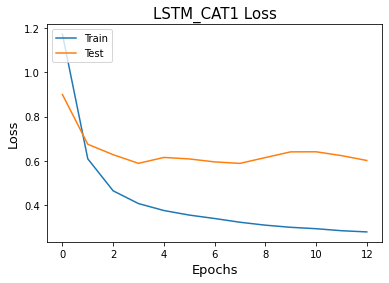

In [144]:
# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('Loss', fontsize = 13)
plt.title('LSTM_CAT1 Loss', fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();


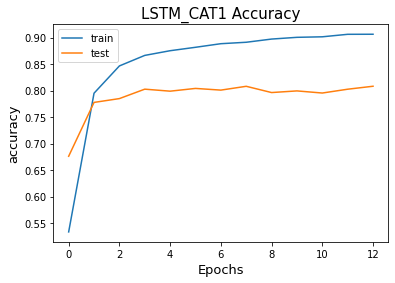

In [145]:
plt.plot(unicorns.history['accuracy'], label='train')
plt.plot(unicorns.history['val_accuracy'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('accuracy', fontsize = 13)
plt.title('LSTM_CAT1 Accuracy', fontsize = 15)
plt.legend()
plt.show()

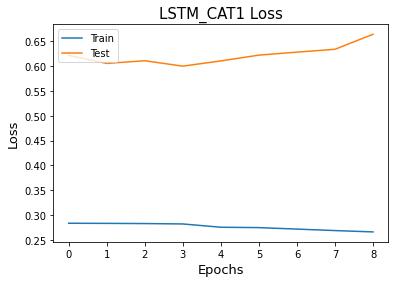

In [146]:
# Plot training & validation loss values
plt.plot(unicorns_batch64.history['loss'])
plt.plot(unicorns_batch64.history['val_loss'])
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('Loss', fontsize = 13)
plt.title('LSTM_CAT1 Loss', fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();


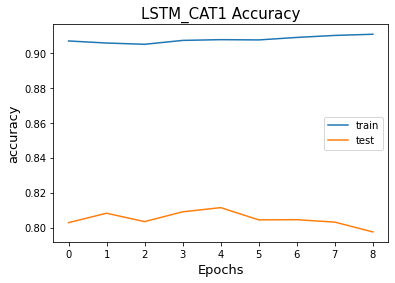

In [147]:
plt.plot(unicorns_batch64.history['accuracy'], label='train')
plt.plot(unicorns_batch64.history['val_accuracy'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('accuracy', fontsize = 13)
plt.title('LSTM_CAT1 Accuracy', fontsize = 15)
plt.legend()
plt.show()

In [148]:
model_lstm2 = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(max_features, 128),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(rate = 0.3),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.LSTM(128, dropout = 0.4, recurrent_dropout = 0.4),
                                    tf.keras.layers.Dense(64, activation = 'softmax')
])

model_lstm2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

model_lstm2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
dense_12 (Dense)             (None, None, 64)          8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
dense_13 (Dense)             (None, None, 64)          4160      
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
Total params: 1,399,488
Trainable params: 1,399,488
Non-trainable params: 0
____________________________________________

In [149]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

unicorns2 = model_lstm2.fit(sequences_train, y_train_enc2,
          batch_size=batch_size, 
          epochs=30,
          callbacks = [es],
          validation_data=(sequences_test_val, y_test_enc2))

Epoch 1/30
313/313 [==============================] - 98s 303ms/step - loss: 3.3218 - accuracy: 0.1201 - val_loss: 2.9272 - val_accuracy: 0.1574
Epoch 2/30
313/313 [==============================] - 95s 303ms/step - loss: 2.6424 - accuracy: 0.2568 - val_loss: 2.4179 - val_accuracy: 0.3487
Epoch 3/30
313/313 [==============================] - 94s 301ms/step - loss: 2.2230 - accuracy: 0.3846 - val_loss: 2.1884 - val_accuracy: 0.4065
Epoch 4/30
313/313 [==============================] - 95s 302ms/step - loss: 1.9627 - accuracy: 0.4576 - val_loss: 2.0189 - val_accuracy: 0.4623
Epoch 5/30
313/313 [==============================] - 94s 299ms/step - loss: 1.7783 - accuracy: 0.5110 - val_loss: 1.9377 - val_accuracy: 0.4871
Epoch 6/30
313/313 [==============================] - 94s 301ms/step - loss: 1.6479 - accuracy: 0.5455 - val_loss: 1.8914 - val_accuracy: 0.5073
Epoch 7/30
313/313 [==============================] - 94s 301ms/step - loss: 1.5479 - accuracy: 0.5762 - val_loss: 1.8086 - val_ac

In [150]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

unicorns2_batch64 = model_lstm2.fit(sequences_train, y_train_enc2,
          batch_size=64, 
          epochs=30,
          callbacks = [es],
          validation_data=(sequences_test_val, y_test_enc2))

Epoch 1/30
625/625 [==============================] - 91s 145ms/step - loss: 1.0832 - accuracy: 0.7035 - val_loss: 1.6935 - val_accuracy: 0.5794
Epoch 2/30
625/625 [==============================] - 90s 144ms/step - loss: 1.0815 - accuracy: 0.7055 - val_loss: 1.6959 - val_accuracy: 0.5794
Epoch 3/30
625/625 [==============================] - 90s 144ms/step - loss: 1.0751 - accuracy: 0.7083 - val_loss: 1.7032 - val_accuracy: 0.5756
Epoch 4/30
625/625 [==============================] - 90s 144ms/step - loss: 1.0656 - accuracy: 0.7104 - val_loss: 1.6980 - val_accuracy: 0.5764
Epoch 5/30
625/625 [==============================] - 90s 144ms/step - loss: 1.0465 - accuracy: 0.7153 - val_loss: 1.7104 - val_accuracy: 0.5772
Epoch 6/30
625/625 [==============================] - 90s 144ms/step - loss: 1.0376 - accuracy: 0.7169 - val_loss: 1.7072 - val_accuracy: 0.5778
Epoch 00006: early stopping


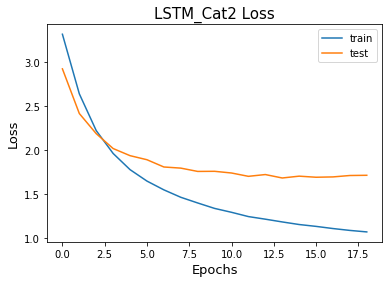

In [151]:
# Plot training & validation loss values
plt.plot(unicorns2.history['loss'], label = 'train')
plt.plot(unicorns2.history['val_loss'], label = 'test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('Loss', fontsize = 13)
plt.title('LSTM_Cat2 Loss', fontsize = 15)
plt.legend()
plt.show();


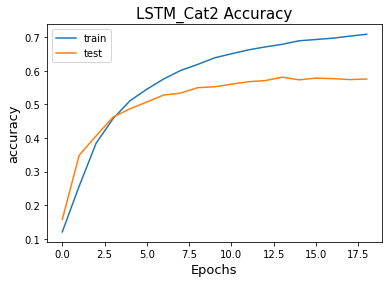

In [152]:
plt.plot(unicorns2.history['accuracy'], label='train')
plt.plot(unicorns2.history['val_accuracy'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('accuracy', fontsize = 13)
plt.title('LSTM_Cat2 Accuracy', fontsize = 15)
plt.legend()
plt.show()

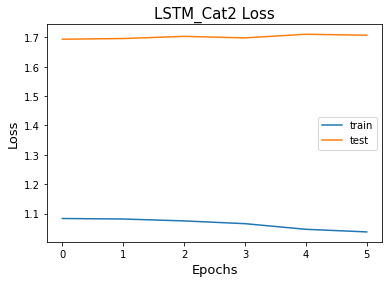

In [153]:
# Plot training & validation loss values
plt.plot(unicorns2_batch64.history['loss'], label = 'train')
plt.plot(unicorns2_batch64.history['val_loss'], label = 'test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('Loss', fontsize = 13)
plt.title('LSTM_Cat2 Loss', fontsize = 15)
plt.legend()
plt.show();


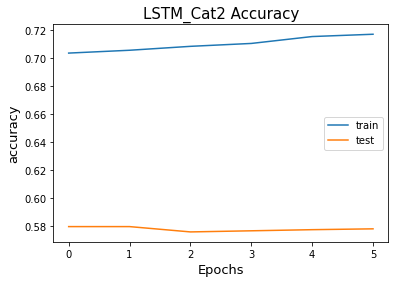

In [154]:
plt.plot(unicorns2_batch64.history['accuracy'], label='train')
plt.plot(unicorns2_batch64.history['val_accuracy'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('accuracy', fontsize = 13)
plt.title('LSTM_Cat2 Accuracy', fontsize = 15)
plt.legend()
plt.show()

# 결론
## 1. 처음에 Dropout 레이어를 쌓지 않고 LSTM 모델을 만들었을 때, 학습 정확도는 epochs이 늘어날 때마다 역전파 알고리즘을 통해 빠르게 Loss를 줄여나갔다. 하지만, 학습 정확도가 올라가는 만큼 테스트 정확도는 일정 시점부터 Loss가 커져가는 것을 볼 수 있었다. 이를 통해서 역전파 알고리즘이 학습 데이터에 과적합 하는 경향을 확인할 수 있었다. 그래서, 과적합을 방지하기 위해 Dropout Layer를 한층 더 쌓아서 학습을 진행했다.
## 
## 2. 그 결과, 이전의 모델보다 학습 데이터의 정확도는 상대적으로 천천히 증가하고 Loss도 천천히 감소했다. 그리고 epoch이 늘어날 때마다 일정 시점이 지나더라도, 테스트 정확도와 Loss는 일정 수치를 유지하면서 학습 데이터의 과적합을 방지하고 이전 모델보다 일반화시킬 수 있는 모델을 구축할 수 있었다.
## 
## 3. 하지만, 딥러닝의 LSTM모델과 앙상블 머신 러닝 모델인 랜덤 포레스트와 성능의 큰 차이가 발생하진 않았다. 물론, LSTM 모델의 성능이 다소 높기는 했지만, 과연 이 텍스트 모델링에 있어서 굳이 딥러닝 모델을 써야하는지에 대한 의문이 들었다.
## 
## 4. 그리고 클래스가 6개로 다소 적은 Cat1의 분류는 약 80%의 테스트 정확도로 일반화 시킬 수 있는 모델이라 판단했지만, 클래스가 64개인 Cat2 분류의 경우, 다소 복잡한 형태이기 때문에 검증 정확도가 60% 미만이 되는 다소 일반화할 수 없는 모델이었다.
## 
## 5. 그래서 LSTM 모델에 Attention 알고리즘을 결합하여, 병렬처리로 장기기억을 저장하는 모델을 구축해보기로 했다.

### 1. 하이퍼 파라미터 튜닝을 많이 하지 않았음에도 불구하고 test의 성능이 약 80%까지 나오는 것을 확인할 수 있다.

### 2. 아무래도, NLP(Natural Language Processing)를 통한 분류 모델은 딥러닝(RNN을 기반으로 한 LSTM) 방법이 더 예측을 잘하는 것을 확인하 수 있다.

### 3. 그 이유에 대해서, NLP(Natural Language Processing)의 경우 비정형 데이터를 다루는 것이기 때문에 비선형적인 관계가 많을 것으로 추론된다. 랜덤 포레스트와 같은 일반적인 머신 러닝 모델의 경우, 정형 데이터에 대해선 높은 예측 성능을 가지지만 비선형적인 데이터. 즉, 비정형 데이터에선 예측 성능이 떨어지는 것을 확인할 수 있다.

### 4. 랜덤포레스트와 LSTM 모델의 성능 비교에서 딥러닝 기반의 모델 성능이 높다는 결론이 나왔기 때문에 이제는, LSTM 모델의 하이퍼 파라미터 튜닝을 통해서 예측 성능을 높여가겠다.

### 5. 라벨링을 두 가지 형태로 진행했다. 그 중에서 대분류 형태인 'Cat1'의 경우 6개의 클래스로 나누어져있다. 그리고 중분류인 'Cat2의 경우, 64개의 클래스로 나눠져있고, 소분류인 'Cat3'은 Unknown 값을 가지는 클래스가 있으므로 타겟값으로 진행하지는 못하였다.

### 6. 대분류 형태를 타겟값으로 진행했을 때, 테스트 데이터에 대해 약 80%의 예측 성능이 나왔다. 중분류 형태를 타겟값으로 진행했을 때, 똑같은 조건에서 약 55%의 다소 낮은 예측 성능이 나왔다. 

### 결론 : 문제의 복잡도가 올라갈수록 비선형적이 문제를 잘 다루는 딥러닝 모델의 예측 성능이 압도적으로 높은 것을 확인할 수 있었다.

## 1. 데이터의 TEXT를 독립 변수, CAT2를 종속 변수로 설정
## 2. TEXT 전처리 - 기호 제거, lemma

## AttentionLayer 쌓은 모델 불러오기

In [106]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

# LSTM with Attention

In [114]:
train1 = pd.concat([train, test])
train1 = train1.reset_index(drop = True)
train1

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles
...,...,...,...,...,...,...,...,...,...,...
49995,B000FGDDI0,Sunbeam 732-500 King Size Heating Pad with Ult...,A3RUBUKF0YX4C7,0/0,4.0,1362182400,Stays on continuously without shutting off! It...,health personal care,health care,pain relievers
49996,B000FVC78C,Reef One Biorb Easy Plants,A1O9H18FJG81FS,0/0,4.0,1362182400,these look great in our 10 gallon tank- colors...,pet supplies,fish aquatic pets,aquarium d cor
49997,B000ICJ8DA,Snoozer Lookout II Pet Car Seat,A3D96MTZP9C1Y,0/0,4.0,1362182400,"This works great, but needs a better way to at...",pet supplies,dogs,carriers travel products
49998,B000Q7AH3W,Omega Paw Tricky Treat Ball,A37L6DBOH234BC,0/0,5.0,1362182400,she absolutely LOVES this thing. I dice up gre...,pet supplies,dogs,toys


In [115]:
train1[['Cat1','Cat2']] = train1[['Cat1', 'Cat2']].apply(lambda x : x.str.replace(' ',''))
train1

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocerygourmetfood,meatpoultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toysgames,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toysgames,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toysgames,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toysgames,puzzles,jigsaw puzzles
...,...,...,...,...,...,...,...,...,...,...
49995,B000FGDDI0,Sunbeam 732-500 King Size Heating Pad with Ult...,A3RUBUKF0YX4C7,0/0,4.0,1362182400,Stays on continuously without shutting off! It...,healthpersonalcare,healthcare,pain relievers
49996,B000FVC78C,Reef One Biorb Easy Plants,A1O9H18FJG81FS,0/0,4.0,1362182400,these look great in our 10 gallon tank- colors...,petsupplies,fishaquaticpets,aquarium d cor
49997,B000ICJ8DA,Snoozer Lookout II Pet Car Seat,A3D96MTZP9C1Y,0/0,4.0,1362182400,"This works great, but needs a better way to at...",petsupplies,dogs,carriers travel products
49998,B000Q7AH3W,Omega Paw Tricky Treat Ball,A37L6DBOH234BC,0/0,5.0,1362182400,she absolutely LOVES this thing. I dice up gre...,petsupplies,dogs,toys


In [116]:
train_a = train1[['Text', 'Cat1', 'Cat2']]
test_a = test[['Text', 'Cat1', 'Cat2']]

train_a.shape, test_a.shape

((50000, 3), (10000, 3))

In [117]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
stop_words = set(stopwords.words('english'))
print(len(stop_words))

179


In [119]:
def tokenize_re(text, remove_stopwords = True):
    tokens = re.sub(r"[^a-zA-Z0-9 ]", '', text)
    tokens = re.sub("'s\b", "", tokens)
    tokens = re.sub('[m]{2,}', 'mm', tokens)
    tokens = tokens.lower()


    if remove_stopwords:
        tokens = ' '.join(word for word in tokens.split() if not word in stop_words if len(word) > 1)
    else :
        tokens = ' '.join(word for word in tokens.split() if len(word) > 1)


    return tokens

In [120]:
clean_text = []

for s in train_a['Text']:
    clean_text.append(tokenize_re(s))
clean_text[:5]

['description photo product needs changed indicate product buffalos version beef jerky',
 'great book well thought easily imagine events happening westing game great way tie two things together events well sequenced exciting ellen raskin wrote wonderful book',
 'first year teacher teaching 5th grade special reading class high comprehension levels reading book one best things taught year expanded minds allowing put characters place easy students make mind movies even used whole reading class time order finish book students couldnt wait hear end excellent book reading every year students',
 'got book bookfair school looking something summer turned read thing couple days school let loved never suspected ending overall plot intriguingly superb tell raskin extremely intelligent person writes intelligent people qualities look good book one outshines recommend anyone everyone even mom liked talk critic',
 'hi im martine redman created puzzle briarpatch using great photo jean marzollo walter w

In [121]:
train_a['text'] = clean_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
train_a

,Text,Cat1,Cat2,text
0,The description and photo on this product need...,grocerygourmetfood,meatpoultry,description photo product needs changed indica...
1,This was a great book!!!! It is well thought t...,toysgames,games,great book well thought easily imagine events ...
2,"I am a first year teacher, teaching 5th grade....",toysgames,games,first year teacher teaching 5th grade special ...
3,I got the book at my bookfair at school lookin...,toysgames,games,got book bookfair school looking something sum...
4,Hi! I'm Martine Redman and I created this puzz...,toysgames,puzzles,hi im martine redman created puzzle briarpatch...
...,...,...,...,...
49995,Stays on continuously without shutting off! It...,healthpersonalcare,healthcare,stays continuously without shutting however re...
49996,these look great in our 10 gallon tank- colors...,petsupplies,fishaquaticpets,look great 10 gallon tank colors nice fitting ...
49997,"This works great, but needs a better way to at...",petsupplies,dogs,works great needs better way attach made ow lo...
49998,she absolutely LOVES this thing. I dice up gre...,petsupplies,dogs,absolutely loves thing dice green beans carrot...


In [123]:
train_a.isnull().sum()

Text    0
Cat1    0
Cat2    0
text    0
dtype: int64

In [124]:
for i in train_a[train_a['text'] == ''].index:
    train_a = train_a.drop(i, axis = 0)

In [125]:
train_a[train_a['text'] == '']

,Text,Cat1,Cat2,text


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 681
텍스트의 평균 길이 : 38.29565773946437


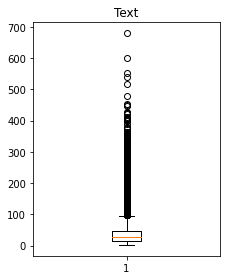

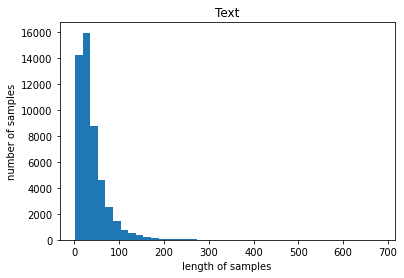

In [126]:
text_len = [len(s.split()) for s in train_a['text']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))

plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()


plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [127]:
def below_threshold_len(max_len, nested_list):
    cnt = 0

    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt += 1

    print('전체 텍스트 중 길이가 %s 이하인 샘플의 비율 : %s'%(max_len, (cnt / len(nested_list))))

In [128]:
below_threshold_len(75, train_a['text'])

전체 텍스트 중 길이가 75 이하인 샘플의 비율 : 0.8959737584255055


In [129]:
train_a = train_a[train_a['text'].apply(lambda x: len(x.split()) <= 75)]

print('전체 데이터 수 : ', len(train_a))

전체 데이터 수 :  44796


In [130]:
train_a

,Text,Cat1,Cat2,text
0,The description and photo on this product need...,grocerygourmetfood,meatpoultry,description photo product needs changed indica...
1,This was a great book!!!! It is well thought t...,toysgames,games,great book well thought easily imagine events ...
2,"I am a first year teacher, teaching 5th grade....",toysgames,games,first year teacher teaching 5th grade special ...
3,I got the book at my bookfair at school lookin...,toysgames,games,got book bookfair school looking something sum...
4,Hi! I'm Martine Redman and I created this puzz...,toysgames,puzzles,hi im martine redman created puzzle briarpatch...
...,...,...,...,...
49995,Stays on continuously without shutting off! It...,healthpersonalcare,healthcare,stays continuously without shutting however re...
49996,these look great in our 10 gallon tank- colors...,petsupplies,fishaquaticpets,look great 10 gallon tank colors nice fitting ...
49997,"This works great, but needs a better way to at...",petsupplies,dogs,works great needs better way attach made ow lo...
49998,she absolutely LOVES this thing. I dice up gre...,petsupplies,dogs,absolutely loves thing dice green beans carrot...


In [131]:
train_a['decoder_input1'] = train_a['Cat1'].apply(lambda x : 'sostoken ' + x)
train_a['decoder_input2'] = train_a['Cat2'].apply(lambda x : 'sostoken ' + x)

train_a['decoder_target1'] = train_a['Cat1'].apply(lambda x : x + ' eostoken')
train_a['decoder_target2'] = train_a['Cat2'].apply(lambda x : x + ' eostoken')

train_a

,Text,Cat1,Cat2,text,decoder_input1,decoder_input2,decoder_target1,decoder_target2
0,The description and photo on this product need...,grocerygourmetfood,meatpoultry,description photo product needs changed indica...,sostoken grocerygourmetfood,sostoken meatpoultry,grocerygourmetfood eostoken,meatpoultry eostoken
1,This was a great book!!!! It is well thought t...,toysgames,games,great book well thought easily imagine events ...,sostoken toysgames,sostoken games,toysgames eostoken,games eostoken
2,"I am a first year teacher, teaching 5th grade....",toysgames,games,first year teacher teaching 5th grade special ...,sostoken toysgames,sostoken games,toysgames eostoken,games eostoken
3,I got the book at my bookfair at school lookin...,toysgames,games,got book bookfair school looking something sum...,sostoken toysgames,sostoken games,toysgames eostoken,games eostoken
4,Hi! I'm Martine Redman and I created this puzz...,toysgames,puzzles,hi im martine redman created puzzle briarpatch...,sostoken toysgames,sostoken puzzles,toysgames eostoken,puzzles eostoken
...,...,...,...,...,...,...,...,...
49995,Stays on continuously without shutting off! It...,healthpersonalcare,healthcare,stays continuously without shutting however re...,sostoken healthpersonalcare,sostoken healthcare,healthpersonalcare eostoken,healthcare eostoken
49996,these look great in our 10 gallon tank- colors...,petsupplies,fishaquaticpets,look great 10 gallon tank colors nice fitting ...,sostoken petsupplies,sostoken fishaquaticpets,petsupplies eostoken,fishaquaticpets eostoken
49997,"This works great, but needs a better way to at...",petsupplies,dogs,works great needs better way attach made ow lo...,sostoken petsupplies,sostoken dogs,petsupplies eostoken,dogs eostoken
49998,she absolutely LOVES this thing. I dice up gre...,petsupplies,dogs,absolutely loves thing dice green beans carrot...,sostoken petsupplies,sostoken dogs,petsupplies eostoken,dogs eostoken


In [132]:
encoder_input = np.array(train_a['text'])
decoder_input1 = np.array(train_a['decoder_input1'])
decoder_input2 = np.array(train_a['decoder_input2'])
decoder_target1 = np.array(train_a['decoder_target1'])
decoder_target2 = np.array(train_a['decoder_target2'])

In [133]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[10803 42531 43589 ...  1177 10234 28731]


In [134]:
encoder_input = encoder_input[indices]
decoder_input1 = decoder_input1[indices]
decoder_input2 = decoder_input2[indices]
decoder_target1 = decoder_target1[indices]
decoder_target2 = decoder_target2[indices]

In [176]:
len(indices)

44796

In [135]:
n_of_val = int(len(encoder_input)*0.25)
print('테스트 데이터 수 :', n_of_val)

테스트 데이터 수 : 11199


In [136]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train1 = decoder_input1[:-n_of_val]
decoder_target_train1 = decoder_target1[:-n_of_val]
decoder_input_train2 = decoder_input2[:-n_of_val]
decoder_target_train2 = decoder_target2[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test1 = decoder_input1[-n_of_val:]
decoder_target_test1 = decoder_target1[-n_of_val:]
decoder_input_test2 = decoder_input2[-n_of_val:]
decoder_target_test2 = decoder_target2[-n_of_val:]

In [137]:
print('훈련 데이터의 개수 :',len(encoder_input_train))
print('훈련 레이블(Cat1)의 개수 :',len(decoder_input_train1))
print('훈련 레이블의(Cat2)의 개수 :',len(decoder_input_train2))
print('훈련 레이블(Cat1)의 개수 :',len(decoder_target_train1))
print('훈련 레이블(Cat2)의 개수 :',len(decoder_target_train2))
print('--------'* 10)
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블(Cat1)의 개수 :',len(decoder_input_test1))
print('테스트 레이블(Cat2)의 개수 :',len(decoder_input_test2))
print('테스트 레이블(Cat1)의 개수 :',len(decoder_target_test1))
print('테스트 레이블(Cat2)의 개수 :',len(decoder_target_test2))

훈련 데이터의 개수 : 33597
훈련 레이블(Cat1)의 개수 : 33597
훈련 레이블의(Cat2)의 개수 : 33597
훈련 레이블(Cat1)의 개수 : 33597
훈련 레이블(Cat2)의 개수 : 33597
--------------------------------------------------------------------------------
테스트 데이터의 개수 : 11199
테스트 레이블(Cat1)의 개수 : 11199
테스트 레이블(Cat2)의 개수 : 11199
테스트 레이블(Cat1)의 개수 : 11199
테스트 레이블(Cat2)의 개수 : 11199


In [138]:
decoder_target_train1

array(['toysgames eostoken', 'beauty eostoken',
       'healthpersonalcare eostoken', ..., 'petsupplies eostoken',
       'grocerygourmetfood eostoken', 'beauty eostoken'], dtype=object)

In [139]:
decoder_input_train1

array(['sostoken toysgames', 'sostoken beauty',
       'sostoken healthpersonalcare', ..., 'sostoken petsupplies',
       'sostoken grocerygourmetfood', 'sostoken beauty'], dtype=object)

In [140]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [141]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 53002
등장 빈도가 6번 이하인 희귀 단어의 수: 43975
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9027
단어 집합에서 희귀 단어의 비율: 82.96856722387834
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.1505001210380374


In [142]:
src_tokenizer = Tokenizer(num_words = max_features) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [143]:
print(encoder_input_train[:3])

[[2, 13, 6165, 3007, 204, 4444, 528, 3, 651, 6166, 20, 651, 2, 5231, 912, 569, 910, 225, 932, 3, 1156, 3, 54, 20, 65, 706, 1003, 40, 6, 20, 742, 190, 917, 2426, 912, 2426, 1422], [573, 154, 307, 4, 111, 5, 357, 458, 342, 22, 124, 544, 213, 454], [216, 2, 5, 27, 201, 498, 110, 499, 12]]


In [144]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train1)

In [145]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7
등장 빈도가 5번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [146]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train2)

In [147]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 65
등장 빈도가 5번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 65
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [148]:
decoder_input_train1

array(['sostoken toysgames', 'sostoken beauty',
       'sostoken healthpersonalcare', ..., 'sostoken petsupplies',
       'sostoken grocerygourmetfood', 'sostoken beauty'], dtype=object)

In [149]:
tar_vocab1 = 8
tar_vocab2 = 66
tar_tokenizer1 = Tokenizer(num_words = tar_vocab1)
tar_tokenizer2 = Tokenizer(num_words = tar_vocab2)

tar_tokenizer1.fit_on_texts(decoder_input_train1)
tar_tokenizer1.fit_on_texts(decoder_target_train1)
tar_tokenizer2.fit_on_texts(decoder_input_train2)
tar_tokenizer2.fit_on_texts(decoder_target_train2)

In [150]:
decoder_input_train1 = tar_tokenizer1.texts_to_sequences(decoder_input_train1) 
decoder_target_train1 = tar_tokenizer1.texts_to_sequences(decoder_target_train1)
decoder_input_train2 = tar_tokenizer2.texts_to_sequences(decoder_input_train2) 
decoder_target_train2 = tar_tokenizer2.texts_to_sequences(decoder_target_train2)


decoder_input_test1 = tar_tokenizer1.texts_to_sequences(decoder_input_test1)
decoder_target_test1 = tar_tokenizer1.texts_to_sequences(decoder_target_test1)
decoder_input_test2 = tar_tokenizer2.texts_to_sequences(decoder_input_test2)
decoder_target_test2 = tar_tokenizer2.texts_to_sequences(decoder_target_test2)

In [151]:
len(decoder_input_train1), len(decoder_input_train2), len(decoder_target_train1), len(decoder_target_train2)

(33597, 33597, 33597, 33597)

In [152]:
len(decoder_input_test1), len(decoder_input_test2), len(decoder_target_test1), len(decoder_target_test2)

(11199, 11199, 11199, 11199)

In [153]:
encoder_input_train = sequence.pad_sequences(encoder_input_train, maxlen = 75, padding='post')
encoder_input_test = sequence.pad_sequences(encoder_input_test, maxlen = 75, padding='post')

decoder_input_train1 = sequence.pad_sequences(decoder_input_train1, maxlen = 6, padding='post')
decoder_target_train1 = sequence.pad_sequences(decoder_target_train1, maxlen = 6, padding='post')

decoder_input_train2 = sequence.pad_sequences(decoder_input_train2, maxlen = 6, padding='post')
decoder_target_train2 = sequence.pad_sequences(decoder_target_train2, maxlen = 6, padding='post')

decoder_input_test1 = sequence.pad_sequences(decoder_input_test1, maxlen = 6, padding='post')
decoder_target_test1 = sequence.pad_sequences(decoder_target_test1, maxlen = 6, padding='post')

decoder_input_test2 = sequence.pad_sequences(decoder_input_test2, maxlen = 6, padding='post')
decoder_target_test2 = sequence.pad_sequences(decoder_target_test2, maxlen = 6, padding='post')

In [154]:
decoder_target_test2

array([[21,  2,  0,  0,  0,  0],
       [24,  2,  0,  0,  0,  0],
       [12,  2,  0,  0,  0,  0],
       ...,
       [18,  2,  0,  0,  0,  0],
       [15,  2,  0,  0,  0,  0],
       [15,  2,  0,  0,  0,  0]], dtype=int32)

In [155]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [156]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(75,))

# 인코더의 임베딩 층
enc_emb = Embedding(max_features, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [157]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab1, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [158]:

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab1, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model_cat6 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model_cat6.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 75, 128)      1280000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 75, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [159]:
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab1, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model_cat6 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model_cat6.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 75, 128)      1280000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 75, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [160]:
model_cat6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [161]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
history = model_cat6.fit(x = [encoder_input_train, decoder_input_train1], y = decoder_target_train1, \
          validation_data = ([encoder_input_test, decoder_input_test1], decoder_target_test1),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
132/132 [==============================] - 98s 661ms/step - loss: 0.3811 - accuracy: 0.8544 - val_loss: 0.2407 - val_accuracy: 0.8958
Epoch 2/50
132/132 [==============================] - 87s 656ms/step - loss: 0.1846 - accuracy: 0.9285 - val_loss: 0.1596 - val_accuracy: 0.9405
Epoch 3/50
132/132 [==============================] - 86s 653ms/step - loss: 0.1110 - accuracy: 0.9615 - val_loss: 0.1340 - val_accuracy: 0.9521
Epoch 4/50
132/132 [==============================] - 86s 652ms/step - loss: 0.0868 - accuracy: 0.9704 - val_loss: 0.1008 - val_accuracy: 0.9657
Epoch 5/50
132/132 [==============================] - 86s 652ms/step - loss: 0.0745 - accuracy: 0.9748 - val_loss: 0.1018 - val_accuracy: 0.9667
Epoch 6/50
132/132 [==============================] - 86s 650ms/step - loss: 0.0674 - accuracy: 0.9775 - val_loss: 0.0928 - val_accuracy: 0.9691
Epoch 7/50
132/132 [==============================] - 86s 651ms/step - loss: 0.0615 - accuracy: 0.9795 - val_loss: 0.0933 - val_ac

In [162]:
attention_score = model_cat6.evaluate([encoder_input_train, decoder_input_train1], decoder_target_train1)

1050/1050 [==============================] - 50s 48ms/step - loss: 0.0191 - accuracy: 0.9936


In [163]:
attention_score_test = model_cat6.evaluate([encoder_input_test, decoder_input_test1], decoder_target_test1)

350/350 [==============================] - 17s 48ms/step - loss: 0.1271 - accuracy: 0.9683


In [164]:

columns = ['DATA', 'LOSS', 'ACCURACY']

Summary_score = pd.DataFrame({'DATA' : ['Predict_Cat1_Train', 'Predict_Cat1_Test'], 'LOSS' : [attention_score[0], attention_score_test[0]], 'ACCURACY' : [attention_score[1], attention_score_test[1]]})
Summary_score

,DATA,LOSS,ACCURACY
0,Predict_Cat1_Train,0.019103,0.993576
1,Predict_Cat1_Test,0.127108,0.968316


In [165]:
model_cat6.save('model_attention.h5')

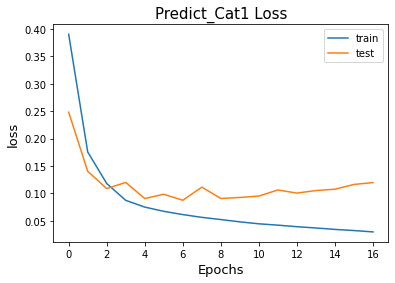

In [215]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('loss', fontsize = 13)
plt.title('Predict_Cat1 Loss', fontsize = 15)
plt.legend()
plt.show()

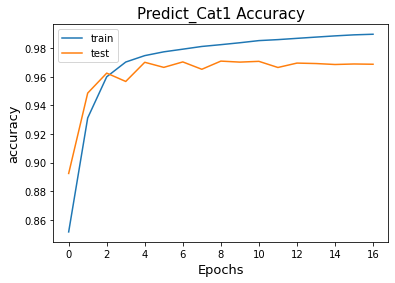

In [211]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('accuracy', fontsize = 13)
plt.title('Predict_Cat1 Accuracy', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
## 모델링 예측 카테고리(Cat1) 출력 테스트 진행

In [212]:
src_index_to_word = src_tokenizer.index_word
tar_word_to_index1 = tar_tokenizer1.word_index
tar_index_to_word1 = tar_tokenizer1.index_word


In [217]:
# 인코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape = (hidden_size,))
decoder_state_input_c = Input(shape = (hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해선 초기 상태(intial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현

# 훈련 과정에서와 달리, LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 간직하고 있음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state = [decoder_state_input_h,
                                                                               decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape= (75, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)

In [216]:
def decode_sequence1(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index1['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word1[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= 5):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [218]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i != 0):
            temp += src_index_to_word[i]+' '
    return temp

def seq2cat1(input_seq):
    temp=''
    for i in input_seq:
        if ((i != 0 and i != tar_word_to_index1['sostoken']) and i != tar_word_to_index1['eostoken']):
            temp += tar_index_to_word1[i] + ' '

    return temp

In [219]:
for i in range(1, 100):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 카테고리 :",seq2cat1(decoder_input_test1[i]))
    print("예측 카테고리 :",decode_sequence1(encoder_input_test[i].reshape(1, 75)))
    print("\n")

원문 :  using particular cat food ten years never one cats ever seen house anywhere works 
실제 카테고리 : petsupplies 
예측 카테고리 :  petsupplies


원문 :  im pleased blades screens remington shaver great price fast delivery 
실제 카테고리 : healthpersonalcare 
예측 카테고리 :  healthpersonalcare


원문 :  couldnt find anywhere lowes sold system replacement batteries pet stores area didnt carry im really glad could find online least recommend getting extras 
실제 카테고리 : petsupplies 
예측 카테고리 :  healthpersonalcare


원문 :  socks exactly looking expected great produce highly recommend 
실제 카테고리 : healthpersonalcare 
예측 카테고리 :  healthpersonalcare


원문 :  zinc gives 30 effect zinc zinc tested help get rid common cold zinc tastes better doesnt help get rid common cold well zinc wouldnt buy unless like taste dont care work 
실제 카테고리 : healthpersonalcare 
예측 카테고리 :  healthpersonalcare


원문 :  think item hard reason doesnt always hook another reason dont like item hard last step last step put end loops left behind done would 

In [220]:
x = {}
for i in range(500):
    x[i] = [seq2cat1(decoder_input_test1[i]), decode_sequence1(encoder_input_test[i].reshape(1, 75))]
    # print("원문 : ",seq2text(encoder_input_test[i]))
    # print("실제 카테고리 :",seq2cat2(decoder_input_test2[i]))
    # print("예측 카테고리 :",decode_sequence2(encoder_input_test[i].reshape(1, 75)))
    # print("\n")


count = 0
for i in range(500):
    if x[i][0].replace(' ','') != x[i][1].replace(' ',''):
        count += 1
    else :
        continue

print('0번에서 500번까지에서 카테고리 불일치 수:',count)

0번에서 500번까지에서 카테고리 불일치 수: 89


In [ ]:
stop

## CAT2 클래스 예측 모델링 진행

In [221]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(75,))

# 인코더의 임베딩 층
enc_emb = Embedding(max_features, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab2, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])


# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab2, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model_cat64 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model_cat64.summary()


attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab2, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model_cat64 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model_cat64.summary()


Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 75)]         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 75, 128)      1280000     input_9[0][0]                    
__________________________________________________________________________________________________
lstm_9 (LSTM)                   [(None, 75, 256), (N 394240      embedding_7[0][0]                
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, None)]       0                                            
___________________________________________________________________________________________

In [222]:
model_cat64.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [223]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
history_64 = model_cat64.fit(x = [encoder_input_train, decoder_input_train2], y = decoder_target_train2, \
          validation_data = ([encoder_input_test, decoder_input_test2], decoder_target_test2),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
132/132 [==============================] - 103s 706ms/step - loss: 0.7210 - accuracy: 0.8216 - val_loss: 0.5445 - val_accuracy: 0.8507
Epoch 2/50
132/132 [==============================] - 92s 698ms/step - loss: 0.5098 - accuracy: 0.8582 - val_loss: 0.5066 - val_accuracy: 0.8570
Epoch 3/50
132/132 [==============================] - 92s 697ms/step - loss: 0.4346 - accuracy: 0.8772 - val_loss: 0.4340 - val_accuracy: 0.8781
Epoch 4/50
132/132 [==============================] - 92s 696ms/step - loss: 0.3695 - accuracy: 0.8976 - val_loss: 0.4239 - val_accuracy: 0.8871
Epoch 5/50
132/132 [==============================] - 91s 689ms/step - loss: 0.3310 - accuracy: 0.9084 - val_loss: 0.3818 - val_accuracy: 0.8967
Epoch 6/50
132/132 [==============================] - 92s 700ms/step - loss: 0.3040 - accuracy: 0.9164 - val_loss: 0.3408 - val_accuracy: 0.9080
Epoch 7/50
132/132 [==============================] - 91s 689ms/step - loss: 0.2823 - accuracy: 0.9226 - val_loss: 0.3251 - val_a

In [224]:
attention_score_64 = model_cat64.evaluate([encoder_input_train, decoder_input_train2], decoder_target_train2)

1050/1050 [==============================] - 50s 48ms/step - loss: 0.0891 - accuracy: 0.9754


In [225]:
attention_score_test_64 = model_cat64.evaluate([encoder_input_test, decoder_input_test2], decoder_target_test2)

350/350 [==============================] - 17s 48ms/step - loss: 0.3191 - accuracy: 0.9269


In [226]:
columns = ['DATA', 'LOSS', 'ACCURACY']

Summary_score_64 = pd.DataFrame({'DATA' : ['Predict_Cat2_Train', 'Predict_Cat2_Test'], 'LOSS' : [attention_score_64[0], attention_score_test_64[0]], 'ACCURACY' : [attention_score_64[1], attention_score_test_64[1]]})
Summary_score_64

,DATA,LOSS,ACCURACY
0,Predict_Cat2_Train,0.089098,0.975370
1,Predict_Cat2_Test,0.319124,0.926913


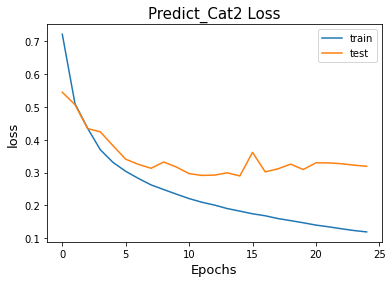

In [227]:
plt.plot(history_64.history['loss'], label='train')
plt.plot(history_64.history['val_loss'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('loss', fontsize = 13)
plt.title('Predict_Cat2 Loss', fontsize = 15)
plt.legend()
plt.show()

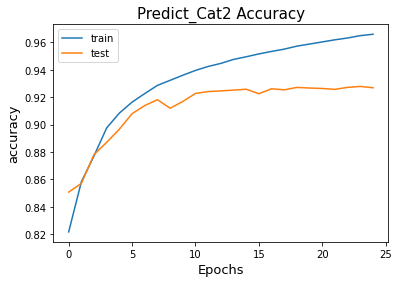

In [228]:
plt.plot(history_64.history['accuracy'], label='train')
plt.plot(history_64.history['val_accuracy'], label='test')
plt.xlabel('Epochs', fontsize = 13)
plt.ylabel('accuracy', fontsize = 13)
plt.title('Predict_Cat2 Accuracy', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
stop

## 모델링 예측 카테고리(Cat2) 출력 테스트 진행

In [229]:
src_index_to_word = src_tokenizer.index_word

tar_word_to_index2 = tar_tokenizer2.word_index
tar_index_to_word2 = tar_tokenizer2.index_word

In [230]:
# 인코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape = (hidden_size,))
decoder_state_input_c = Input(shape = (hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해선 초기 상태(intial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현

# 훈련 과정에서와 달리, LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 간직하고 있음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state = [decoder_state_input_h,
                                                                               decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape= (75, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)

In [231]:
def decode_sequence2(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index2['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word2[sampled_token_index]

        if(sampled_token != 'eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= 5):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [232]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i != 0):
            temp += src_index_to_word[i]+' '
    return temp

def seq2cat2(input_seq):
    temp=''
    for i in input_seq:
        if ((i != 0 and i != tar_word_to_index2['sostoken']) and i != tar_word_to_index2['eostoken']):
            temp += tar_index_to_word2[i] + ' '

    return temp    

In [233]:
x = {}
for i in range(500):
    x[i] = [seq2cat2(decoder_input_test2[i]), decode_sequence2(encoder_input_test[i].reshape(1, 75))]
    # print("원문 : ",seq2text(encoder_input_test[i]))
    # print("실제 카테고리 :",seq2cat2(decoder_input_test2[i]))
    # print("예측 카테고리 :",decode_sequence2(encoder_input_test[i].reshape(1, 75)))
    # print("\n")


count = 0
for i in range(500) :
    if x[i][0].replace(' ','') != x[i][1].replace(' ','') :
        count += 1
    else :
        continue

print('0번에서 500번까지에서 카테고리 불일치 수:',count)

0번에서 500번까지에서 카테고리 불일치 수: 200


# 검색어를 통한 카테고리 예측 후, 카테고리에 맞는 높은 평점 Top 5 제품 추천

## 단순히 평균 평점이 높은 제품을 추천해주기엔 불안정한 경우의 수들이 있다.
## 예를 들자면, 1명이 구매한 A라는 제품의 평점이 5점이고, 100명이 주문한 B 제품의 평균 평점이 4.5라면 상대적으로 많은 소비자들이 B 제품 구매 관여도가 낮을 것이다. 반면에, 1명의 평균 평점이 5점이있던 제품은 1명의 평점만 있기 때문에 오히려 제품 구매에 많이 망설이게 될 것이다.
## 그러므로, 평점이 총 10점이라는 새로운 평점 계산을 만들 것이다. 기본적인 평균 평점이 5점 만점으로 두고, 나머지 평균 평점 x (제품 구매의 총 수 / 전체 구매 수)를 가중치로 더한 값으로 평점을 재조정하여, 높은 순서대로 추출을 할 것이다.

In [84]:
rating_rec = train1[['productId', 'Score', 'Cat1', 'Cat2']]
rating_rec

,productId,Score,Cat1,Cat2
0,B000E46LYG,3.0,grocery gourmet food,meat poultry
1,B000GRA6N8,5.0,toys games,games
2,B000GRA6N8,5.0,toys games,games
3,B000GRA6N8,5.0,toys games,games
4,B00000DMDQ,5.0,toys games,puzzles
...,...,...,...,...
49995,B000FGDDI0,4.0,health personal care,health care
49996,B000FVC78C,4.0,pet supplies,fish aquatic pets
49997,B000ICJ8DA,4.0,pet supplies,dogs
49998,B000Q7AH3W,5.0,pet supplies,dogs


In [85]:
mean_rating = pd.DataFrame(rating_rec.groupby('productId').Score.mean())
mean_rating = mean_rating.reset_index()
mean_rating

,productId,Score
0,B0000017QN,4.000000
1,B0000017QZ,5.000000
2,B00000DMBB,4.750000
3,B00000DMBD,5.000000
4,B00000DMBE,5.000000
...,...,...
24378,B000UYC9SW,4.285714
24379,B000V35FGA,4.000000
24380,B000V521PQ,5.000000
24381,B000V5BXP0,5.000000


In [86]:
total_buying = pd.DataFrame(rating_rec['productId'].value_counts()).reset_index()
total_buying = total_buying.rename(columns = {'index':'productId', 'productId':'total'})
total_buying

,productId,total
0,B000FSFNUE,159
1,B000GLRREU,113
2,B0002DK2DU,103
3,B0002643LO,96
4,B00003TL7P,95
...,...,...
24378,B000CMHMUC,1
24379,B00028PNHK,1
24380,B000C237HO,1
24381,B000EIKJ8G,1


In [87]:
rating_rec = rating_rec.drop('Score', axis = 1)
rating_rec = pd.merge(rating_rec, mean_rating, how = 'inner', on = 'productId')
rating_rec = pd.merge(rating_rec, total_buying, how = 'inner', on = 'productId')

In [88]:
rating_rec

,productId,Cat1,Cat2,Score,total
0,B000E46LYG,grocery gourmet food,meat poultry,3.000000,1
1,B000GRA6N8,toys games,games,4.227273,22
2,B000GRA6N8,toys games,games,4.227273,22
3,B000GRA6N8,toys games,games,4.227273,22
4,B000GRA6N8,toys games,games,4.227273,22
...,...,...,...,...,...
49995,B000BSZBHS,health personal care,nutrition wellness,5.000000,1
49996,B000BHQ5JC,beauty,hair care,5.000000,1
49997,B000GC0FIE,grocery gourmet food,beverages,5.000000,1
49998,B000OV5N1Q,health personal care,health care,5.000000,1


In [89]:
## 새로운 평점 추출 - 기존 평점 + (총 판매량 / 100) - 판매량이 높고, 평균 평점이 높을수록 추천했을 때, 구매 결정이 다소 빠를 것이라 판단함.
rating_rec['new_rating'] = rating_rec['Score'] + (rating_rec['total']/100)

In [90]:
rating_rec = rating_rec.sort_values('new_rating', ascending=False)
rating_rec

,productId,Cat1,Cat2,Score,total,new_rating
9765,B000FSFNUE,pet supplies,cats,4.748428,159,6.338428
9748,B000FSFNUE,pet supplies,cats,4.748428,159,6.338428
9750,B000FSFNUE,pet supplies,cats,4.748428,159,6.338428
9751,B000FSFNUE,pet supplies,cats,4.748428,159,6.338428
9752,B000FSFNUE,pet supplies,cats,4.748428,159,6.338428
...,...,...,...,...,...,...
16007,B000M7QXTS,beauty,hair care,1.000000,1,1.010000
39460,B000NPN6AS,health personal care,health care,1.000000,1,1.010000
39464,B0006O0XWU,beauty,skin care,1.000000,1,1.010000
48470,B000NJE3Q0,beauty,hair care,1.000000,1,1.010000


In [91]:
rating_rec.columns

Index(['productId', 'Cat1', 'Cat2', 'Score', 'total', 'new_rating'], dtype='object')

In [92]:
rating_rec = rating_rec.drop_duplicates()
rating_rec = rating_rec[['Cat1', 'Cat2', 'productId', 'Score', 'total', 'new_rating']]
rating_rec = rating_rec.reset_index(drop = True)
rating_rec

,Cat1,Cat2,productId,Score,total,new_rating
0,pet supplies,cats,B000FSFNUE,4.748428,159,6.338428
1,baby products,gifts,B000BNQC58,4.597826,92,5.517826
2,health personal care,personal care,B000GLRREU,4.353982,113,5.483982
3,baby products,feeding,B0000DEW8N,4.830508,59,5.420508
4,health personal care,household supplies,B000IV0REA,4.818182,55,5.368182
...,...,...,...,...,...,...
24378,beauty,hair care,B000M7QXTS,1.000000,1,1.010000
24379,health personal care,health care,B000NPN6AS,1.000000,1,1.010000
24380,beauty,skin care,B0006O0XWU,1.000000,1,1.010000
24381,beauty,hair care,B000NJE3Q0,1.000000,1,1.010000


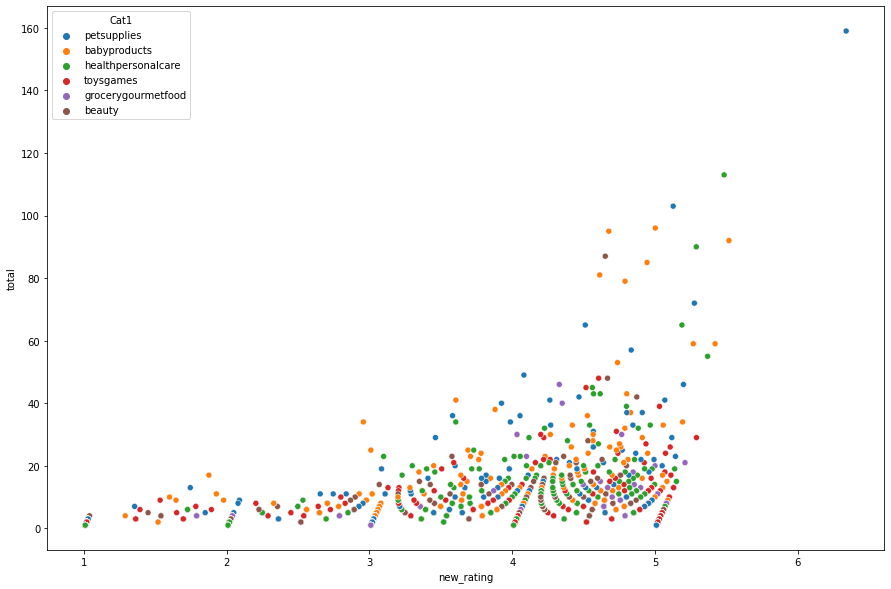

In [243]:
plt.title('Category1 & Total amount')
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'new_rating', y = 'total', hue = 'Cat1', data = rating_rec)

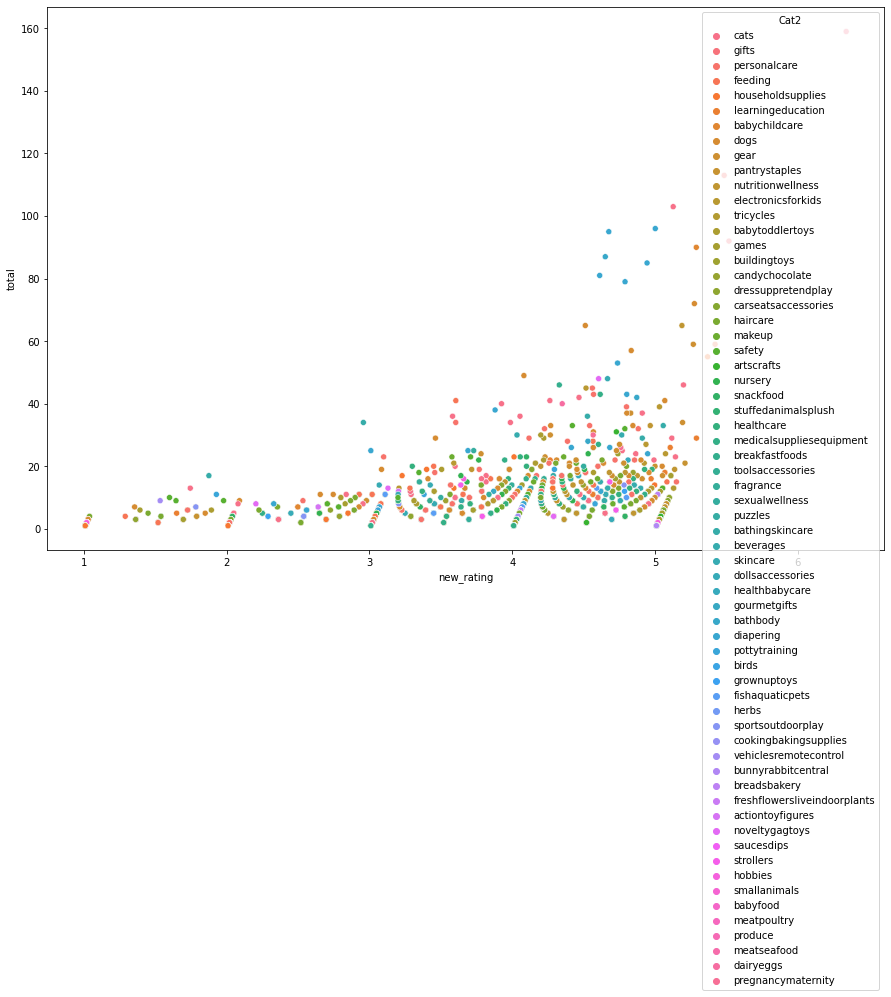

In [244]:
plt.title('Category2 & Total amount')
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'new_rating', y = 'total', hue = 'Cat2', data = rating_rec)

In [93]:
rating_rec[rating_rec['Cat1'] == 'beauty'][:5]

,Cat1,Cat2,productId,Score,total,new_rating
31,beauty,hair care,B0009V1YRS,5.0,8,5.08
32,beauty,makeup,B000HP276I,5.0,8,5.08
49,beauty,hair care,B000N2LYTQ,5.0,7,5.07
61,beauty,hair care,B0007CXXNC,5.0,7,5.07
69,beauty,tools accessories,B000MIR7TM,5.0,6,5.06


In [94]:
def search_rec_cat1(cat1):
    return rating_rec[rating_rec['Cat1'] == cat1][:5]

def search_rec_cat2(cat2):
    return rating_rec[rating_rec['Cat2'] == cat2][:5]

In [96]:
search_rec_cat1('pet supplies')

,Cat1,Cat2,productId,Score,total,new_rating
0,pet supplies,cats,B000FSFNUE,4.748428,159,6.338428
7,pet supplies,dogs,B000HQHUFA,4.555556,72,5.275556
10,pet supplies,cats,B000PU31MY,4.739130,46,5.199130
14,pet supplies,cats,B000F4W02M,4.913043,23,5.143043
18,pet supplies,cats,B0002DK2DU,4.097087,103,5.127087


In [100]:
search_rec_cat3('pet supplies').sort_values('Score', ascending = False)[:5]

,Cat1,Cat2,productId,Score,total,new_rating
6400,pet supplies,dogs,B0000DAIPM,5.0,1,5.01
8077,pet supplies,birds,B000OX2740,5.0,1,5.01
8060,pet supplies,cats,B000HHLK2S,5.0,1,5.01
8055,pet supplies,cats,B0002ARX7Q,5.0,1,5.01
8054,pet supplies,cats,B0009YWE0G,5.0,1,5.01


In [248]:
search_rec_cat1('toysgames')

,Cat1,Cat2,productId,Score,total,new_rating
5,toysgames,learningeducation,B00008BFZH,5.000000,29,5.290000
16,toysgames,electronicsforkids,B00005BHK7,5.000000,13,5.130000
17,toysgames,tricycles,B00005KBVD,5.000000,13,5.130000
20,toysgames,babytoddlertoys,B00009YEGL,4.941176,17,5.111176
21,toysgames,games,B00000IV34,4.941176,17,5.111176


In [249]:
search_rec_cat2('makeup')

,Cat1,Cat2,productId,Score,total,new_rating
32,beauty,makeup,B000HP276I,5.0,8,5.08
75,beauty,makeup,B00021CUK0,5.0,6,5.06
191,beauty,makeup,B0001EKYJ2,5.0,4,5.04
214,beauty,makeup,B000B8YYKI,5.0,4,5.04
265,beauty,makeup,B000J1BF3Q,5.0,4,5.04


In [250]:
search_rec_cat2('cats')

,Cat1,Cat2,productId,Score,total,new_rating
0,petsupplies,cats,B000FSFNUE,4.748428,159,6.338428
10,petsupplies,cats,B000PU31MY,4.739130,46,5.199130
14,petsupplies,cats,B000F4W02M,4.913043,23,5.143043
18,petsupplies,cats,B0002DK2DU,4.097087,103,5.127087
19,petsupplies,cats,B000IYSAIW,4.827586,29,5.117586


In [74]:
search_rec_cat3('petsupplies')

NameError: ignored

In [73]:
def search_rec_cat3(cat1):
    return rating_rec[rating_rec['Cat1'] == cat1]

def search_rec_cat4(cat2):
    return rating_rec[rating_rec['Cat2'] == cat2]

In [ ]:
stop

In [20]:
nlp = spacy.load('en_core_web_sm')

def tokenize_glove(document):

    doc = nlp(document)

    token = ' '.join([token.lemma_.strip() for token in doc if (token.is_stop != True) and 
            (token.is_punct != True) and (token.is_alpha == True)])
    

    return token

In [21]:
X_train_glo = train['Text'].apply(tokenize_glove)
X_test_glo = test['Text'].apply(tokenize_glove)

In [22]:
X_train_glo

0        description photo product need change indicate...
1        great book think easily imagine event happen W...
2        year teacher teach grade special reading class...
3        get book bookfair school look summer turn read...
4        hi Martine Redman create puzzle Briarpatch gre...
                               ...                        
39995    convenient find small store tiny lipstick squa...
39996    wore day eat chinese ankle go inch purchase pl...
39997       ok product stay fog free long useful well sure
39998    Glitter body lotion offer tremendous sparkle a...
39999    disappointed scent fragrance smell cheap needl...
Name: Text, Length: 40000, dtype: object

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print('Using Tensorflow version:', tf.__version__)

Using Tensorflow version: 2.5.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


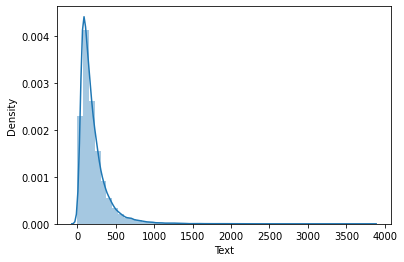

In [24]:
sns.distplot(X_train_glo.apply(len));

In [25]:
X_train_glo.apply(len).mean()

209.830625

In [28]:
len(max(X_train_glo))

264

In [29]:
print("Max Len:", max(map(len, X_train_glo)))
print("I'll use 300 for max padding length")

Max Len: 3818
I'll use 300 for max padding length


In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_glo)

vocab_size = len(tokenizer.word_index)
print('Vocabulary size:', vocab_size)

Vocabulary size: 38089


In [31]:
sequences = tokenizer.texts_to_sequences(X_train_glo)
padded_seq = pad_sequences(sequences, maxlen=300, padding='post', truncating='post')

In [32]:
sequences = tokenizer.texts_to_sequences(X_test_glo)
padded_seq_test = pad_sequences(sequences, maxlen=300, padding='post', truncating='post')

In [36]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kikikiekf","key":"7703b5aa7800af7723aba75c99cb6a6f"}'}

In [37]:
!kaggle datasets download -d authman/pickled-glove840b300d-for-10sec-loading

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [38]:
ls -1ha kaggle.json

kaggle.json


In [39]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        177           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        305           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        914           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5677           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      46027           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11936           False  
connectx

In [40]:
! kaggle datasets download -d authman/pickled-glove840b300d-for-10sec-loading

100% 2.32G/2.33G [00:19<00:00, 110MB/s] 
100% 2.33G/2.33G [00:19<00:00, 128MB/s]


In [41]:
!unzip pickled-glove840b300d-for-10sec-loading.zip

Archive:  pickled-glove840b300d-for-10sec-loading.zip
  inflating: glove.840B.300d.pkl     


In [107]:
import pickle

In [43]:
GLOVE_EMBEDDING_PATH = '/content/glove.840B.300d.pkl'

def load_embeddings(path):
    with open(path,'rb') as f:
        emb_arr = pickle.load(f)
    return emb_arr

def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    unknown_words = []
    
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            unknown_words.append(word)
    return embedding_matrix, unknown_words

In [44]:
glove_matrix, unknown_words_glove = build_matrix(tokenizer.word_index, GLOVE_EMBEDDING_PATH)
print('number unknown words (glove): ', len(unknown_words_glove))

number unknown words (glove):  6740


In [108]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, GlobalMaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [46]:
# first model
model1 = Sequential()

embeddings = Embedding(vocab_size+1, 300, weights=[glove_matrix], input_length=300, trainable=False)

model1.add(embeddings)
model1.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(6, activation='softmax')) 

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          11427000  
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 128)          186880    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 11,614,654
Trainable params: 187,654
Non-trainable params: 11,427,000
_________________________________________________________________


In [47]:
optimizer = Adam(0.001)

model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])

In [48]:
checkpoint1 = ModelCheckpoint('weights1.h5', save_best_only=True, monitor='val_sparse_categorical_accuracy', mode='max')

In [49]:
padded_seq.shape, y_train_enc1.shape, padded_seq_test.shape, y_test_enc1.shape

((40000, 300), (40000, 1), (10000, 300), (10000, 1))

In [50]:
history_glove = model1.fit(padded_seq, y_train_enc1, batch_size=128, epochs=30, validation_data=(padded_seq_test, y_test_enc1), callbacks=[checkpoint1], verbose=1)

Epoch 1/30
313/313 [==============================] - 721s 2s/step - loss: 0.7243 - sparse_categorical_accuracy: 0.7415 - val_loss: 0.6116 - val_sparse_categorical_accuracy: 0.7808
Epoch 2/30
313/313 [==============================] - 705s 2s/step - loss: 0.5001 - sparse_categorical_accuracy: 0.8238 - val_loss: 0.5643 - val_sparse_categorical_accuracy: 0.8004
Epoch 3/30
313/313 [==============================] - 701s 2s/step - loss: 0.4635 - sparse_categorical_accuracy: 0.8353 - val_loss: 0.5522 - val_sparse_categorical_accuracy: 0.8056
Epoch 4/30
313/313 [==============================] - 702s 2s/step - loss: 0.4370 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.5298 - val_sparse_categorical_accuracy: 0.8152
Epoch 5/30
313/313 [==============================] - 705s 2s/step - loss: 0.4187 - sparse_categorical_accuracy: 0.8523 - val_loss: 0.5207 - val_sparse_categorical_accuracy: 0.8156
Epoch 6/30
313/313 [==============================] - 716s 2s/step - loss: 0.4023 - sparse_cate

In [ ]:
stop

In [78]:
# first model
model2 = Sequential()

embeddings = Embedding(vocab_size+1, 300, weights=[glove_matrix], input_length=300, trainable=False)

model2.add(embeddings)
model2.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(64, activation='softmax')) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          11427000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 128)          186880    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
Total params: 11,622,136
Trainable params: 195,136
Non-trainable params: 11,427,000
_________________________________________________________________


In [80]:
optimizer = Adam(0.001)

model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])

In [ ]:
history_glove2 = model2.fit(padded_seq, y_train_enc2, batch_size=128, epochs=30, validation_data=(padded_seq_test, y_test_enc2), callbacks=[checkpoint1], verbose=1)

Epoch 1/30
313/313 [==============================] - 713s 2s/step - loss: 2.5845 - sparse_categorical_accuracy: 0.3629 - val_loss: 1.9240 - val_sparse_categorical_accuracy: 0.4969
Epoch 2/30
313/313 [==============================] - 711s 2s/step - loss: 1.7620 - sparse_categorical_accuracy: 0.5365 - val_loss: 1.6789 - val_sparse_categorical_accuracy: 0.5557
Epoch 3/30
313/313 [==============================] - 708s 2s/step - loss: 1.5554 - sparse_categorical_accuracy: 0.5872 - val_loss: 1.5999 - val_sparse_categorical_accuracy: 0.5735
Epoch 4/30
313/313 [==============================] - 707s 2s/step - loss: 1.4420 - sparse_categorical_accuracy: 0.6150 - val_loss: 1.5305 - val_sparse_categorical_accuracy: 0.5911
Epoch 5/30
313/313 [==============================] - 700s 2s/step - loss: 1.3692 - sparse_categorical_accuracy: 0.6295 - val_loss: 1.4970 - val_sparse_categorical_accuracy: 0.6028
Epoch 6/30
313/313 [==============================] - 699s 2s/step - loss: 1.3188 - sparse_cate

In [ ]:
history_glove2 = model2.fit(padded_seq, y_train_enc2, batch_size=256, epochs=30, validation_data=(padded_seq_test, y_test_enc2), callbacks=[checkpoint1], verbose=1)

## Bert를 활용한 카테고리 예측

In [51]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [110]:
pip install tokenization

In [111]:
pip install sentencepiece

     |████████████████████████████████| 1.2MB 8.3MB/s 


In [112]:
import tokenization
import tensorflow_hub as hub

In [55]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [67]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    clf_output = Dropout(0.4)(clf_output)
    out = Dense(6, activation='softmax')(clf_output)  # remember to use sigmoid for 1/0, not SOFTMAX..
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])  # 0.00002 - 0.00005
    
    return model

In [58]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 11.1 s, sys: 2.02 s, total: 13.1 s
Wall time: 13 s


In [59]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [60]:
X_train_bert = bert_encode(X_train_glo, tokenizer, max_len=50)
X_test_bert = bert_encode(X_test_glo, tokenizer, max_len=50)

In [61]:
X_train_bert[0][0]

array([  101,  6412,  6302,  4031,  2342,  2689,  5769,  4031,  6901,
        2015,  2544, 12486, 12181,  2100,   102,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

In [62]:
len(X_test_bert)

3

In [63]:
len(X_train_bert)

3

In [68]:
model_bert = build_model(bert_layer, max_len=50)

model_bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 50)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [69]:
checkpoint2 = ModelCheckpoint('weights2.h5', monitor='val_loss', save_best_only=True)

history2 = model_bert.fit(
            X_train_bert, y_train_enc1,
            validation_split=0.2,
            epochs=30,
            batch_size=128, callbacks=[checkpoint2])

Epoch 1/30
250/250 [==============================] - 196s 721ms/step - loss: 0.6733 - sparse_categorical_accuracy: 0.7585 - val_loss: 0.5613 - val_sparse_categorical_accuracy: 0.8091
Epoch 2/30
250/250 [==============================] - 179s 715ms/step - loss: 0.3414 - sparse_categorical_accuracy: 0.8832 - val_loss: 0.5296 - val_sparse_categorical_accuracy: 0.8223
Epoch 3/30
250/250 [==============================] - 179s 716ms/step - loss: 0.1885 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.5879 - val_sparse_categorical_accuracy: 0.8202
Epoch 4/30
250/250 [==============================] - 179s 716ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9758 - val_loss: 0.8327 - val_sparse_categorical_accuracy: 0.8126
Epoch 5/30
250/250 [==============================] - 179s 716ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.8456 - val_sparse_categorical_accuracy: 0.8225
Epoch 6/30
250/250 [==============================] - 179s 716ms/step - loss: 0.

In [70]:
model_bert.evaluate(X_test_bert, y_test_enc1)

313/313 [==============================] - 21s 66ms/step - loss: 1.5879 - sparse_categorical_accuracy: 0.8014


[1.5878539085388184, 0.8014000058174133]

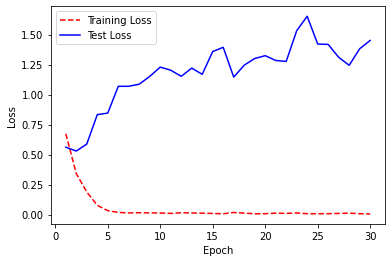

In [71]:
# Get training and test loss histories
training_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss2) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss2, 'r--')
plt.plot(epoch_count, test_loss2, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

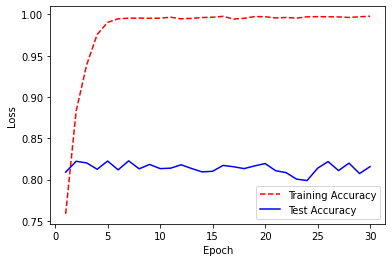

In [72]:
# Get training and test loss histories
training_loss2 = history2.history['sparse_categorical_accuracy']
test_loss2 = history2.history['val_sparse_categorical_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss2) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss2, 'r--')
plt.plot(epoch_count, test_loss2, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [73]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(64, activation='softmax')(clf_output)  # remember to use sigmoid for 1/0, not SOFTMAX..
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])  # 0.00002 - 0.00005
    
    return model

In [74]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 7.43 s, sys: 822 ms, total: 8.25 s
Wall time: 7.87 s


In [75]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [76]:
model_bert64 = build_model(bert_layer, max_len=50)

model_bert64.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 50)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [77]:
checkpoint2 = ModelCheckpoint('weights2.h5', monitor='val_loss', save_best_only=True)

history3 = model_bert64.fit(
            X_train_bert, y_train_enc2,
            validation_split=0.2,
            epochs=20,
            batch_size=128, callbacks=[checkpoint2])

Epoch 1/20
250/250 [==============================] - 196s 720ms/step - loss: 1.9623 - sparse_categorical_accuracy: 0.4996 - val_loss: 1.4796 - val_sparse_categorical_accuracy: 0.6170
Epoch 2/20
250/250 [==============================] - 179s 715ms/step - loss: 1.1172 - sparse_categorical_accuracy: 0.6929 - val_loss: 1.3601 - val_sparse_categorical_accuracy: 0.6430
Epoch 3/20
250/250 [==============================] - 179s 715ms/step - loss: 0.7378 - sparse_categorical_accuracy: 0.7974 - val_loss: 1.3994 - val_sparse_categorical_accuracy: 0.6399
Epoch 4/20
250/250 [==============================] - 179s 715ms/step - loss: 0.4060 - sparse_categorical_accuracy: 0.8965 - val_loss: 1.4573 - val_sparse_categorical_accuracy: 0.6367
Epoch 5/20
250/250 [==============================] - 179s 715ms/step - loss: 0.1672 - sparse_categorical_accuracy: 0.9682 - val_loss: 1.5791 - val_sparse_categorical_accuracy: 0.6344
Epoch 6/20
250/250 [==============================] - 179s 715ms/step - loss: 0.

협업 필터링의 추천 시스템 구현과 NLP(Natural Language Processing)를 통한 검색어와 연관된 카테고리 제품 추천 시스템 구현

이커머스 산업으로 커리어를 키우고 싶어 추천 시스템 구현을 해보고 싶었다. 코드스테이츠의 커리큘럼에서 직접적으로 추천 시스템을 다루지 않아 꼭 배워보고 싶었는데, 이번에 기초적인 부분을 다뤄보고자 진행을 했다. 나아가, 코드스테이츠에서 배웠던 NLP(Natural Language Processing)를 같이 활용해보고자 하여 이번 프로젝트를 실시하였다.

1. 코사인 유사도를 기반으로 제품 간의 유사도를 구한 후, 소비자들이 남긴 제품의 평점을 내적하여, 구매하지 않은 제품들을 추천하는 시스템을 구현한다.
2. 검색어를 바탕으로 카테고리를 분류한 후, 검색어와 연관된 카테고리에서 구매량의 가중치를 더한 높은 평점 순으로 5개의 제품을 추천한다.(리뷰 텍스트로 카테고리를 분류하는 NLP(Natural Language Processing) 모델 구축)
3. NLP(Natural Language Processing)의 경우, 앙상블 모델인 랜덤 포레스트 / LSTM / LSTM with Attention / LSTM with Glove / BERT 구축 후, 성능을 비교한다.

In [65]:
rfc = [0.75, 0.54]
lstm = [0.80, 0.58]
attention = [0.97, 0.93]
glove = [0.83, 0.63]
bert = [0.83, 0.64]


In [70]:
columns = ['Cat1', 'Cat2']
total_score = pd.DataFrame((rfc, lstm, glove, bert, attention), columns=columns)
total_score['Model'] = ['랜덤포레스트', 'LSTM', 'LSTM with Glove', 'BERT', 'LSTM(Attention) Summary']
total_score = total_score[['Model', 'Cat1', 'Cat2']]
total_score

,Model,Cat1,Cat2
0,랜덤포레스트,0.75,0.54
1,LSTM,0.80,0.58
2,LSTM with Glove,0.83,0.63
3,BERT,0.83,0.64
4,LSTM(Attention) Summary,0.97,0.93


In [166]:
pip freeze > requirements.txt